# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import scipy.stats as stat
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

# Problem Statement

Consider only the below columns and prepare a prediction model for predicting Price.


 **Corolla <- Corolla[c('Price', 'Age_08_04', 'KM', 'cc', 'Doors', 'Quarterly_Tax', 'Weight')] **

Model       -- model of the car

Price       -- Offer Price in EUROs

Age_08_04   -- Age in months as in August 2004

KM          -- Accumulated Kilometers on odometer

HP          -- Horse Power

cc          -- Cylinder Volume in cubic centimeters

Doors       -- Number of doors

Quarterly_Tax -- Quarterly road tax in EUROs

Weight      -- Weight in Kilograms


# Importing Dataset

In [2]:
from google.colab import files
upload = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [3]:
raw_data = pd.read_csv('ToyotaCorolla.csv' ,encoding = 'latin1')
raw_data.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [4]:
print("Number of Rows{}Columns".format(raw_data.shape))

Number of Rows(1436, 38)Columns


In [5]:
raw_data = raw_data[["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]]
raw_data

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

# Descriptive Analysis

In [6]:
raw_data.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

**Observation:**  There are some missing values in the Data set by reading Counts form the Above.




# Checking for Data Types

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


**Observation:**  All the data types are correct.

# Renaming the columns name and making it short.

In [8]:
data = raw_data.rename({'Age_08_04': 'Age', 'cc':'CC', 'Quarterly_Tax':'QT'}, axis = 1)
data.head()

Price  Age     KM  HP    CC  Doors  Gears   QT  Weight
0  13500   23  46986  90  2000      3      5  210    1165
1  13750   23  72937  90  2000      3      5  210    1165
2  13950   24  41711  90  2000      3      5  210    1165
3  14950   26  48000  90  2000      3      5  210    1165
4  13750   30  38500  90  2000      3      5  210    1170

# Checking for missing values

In [9]:
data[data.values==0.0]

Empty DataFrame
Columns: [Price, Age, KM, HP, CC, Doors, Gears, QT, Weight]
Index: []

**Observation:** Notice there are no '0' values in the dataset

In [10]:
data.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

# Visualizing Missing Values

<Axes: >

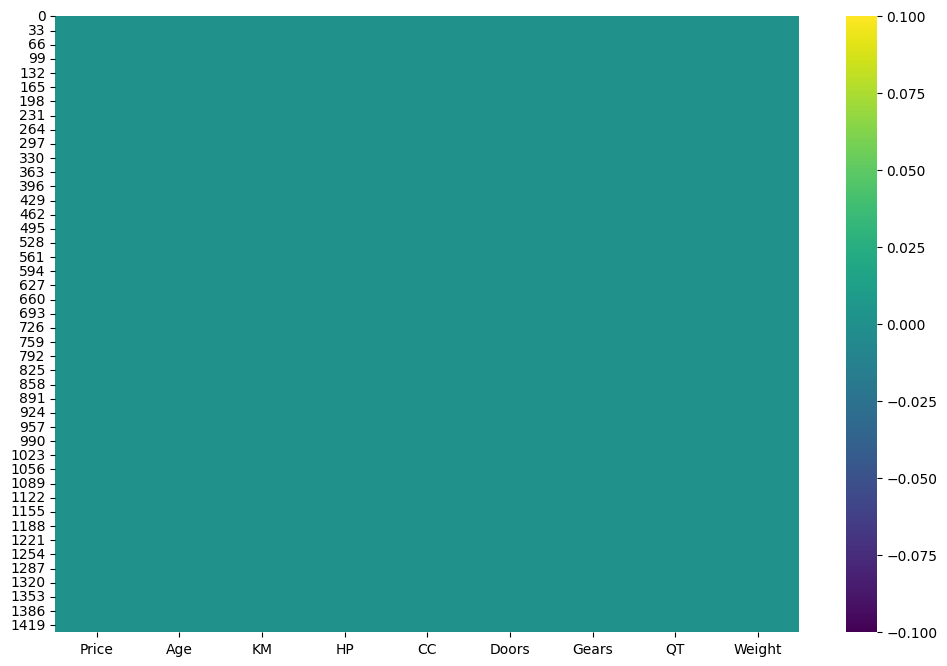

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(), cmap = 'viridis')

**Observation:** Feature 'HP' has missing Values in the dataset.

* We will have to handle the missing values by observing the distribution and making the optimal choice.

In [12]:
data.HP.unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73])

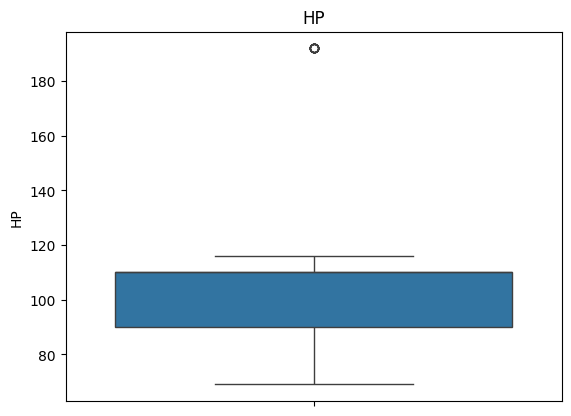

In [13]:
sns.boxplot(data['HP'])
plt.title('HP')
plt.show()

<Axes: >

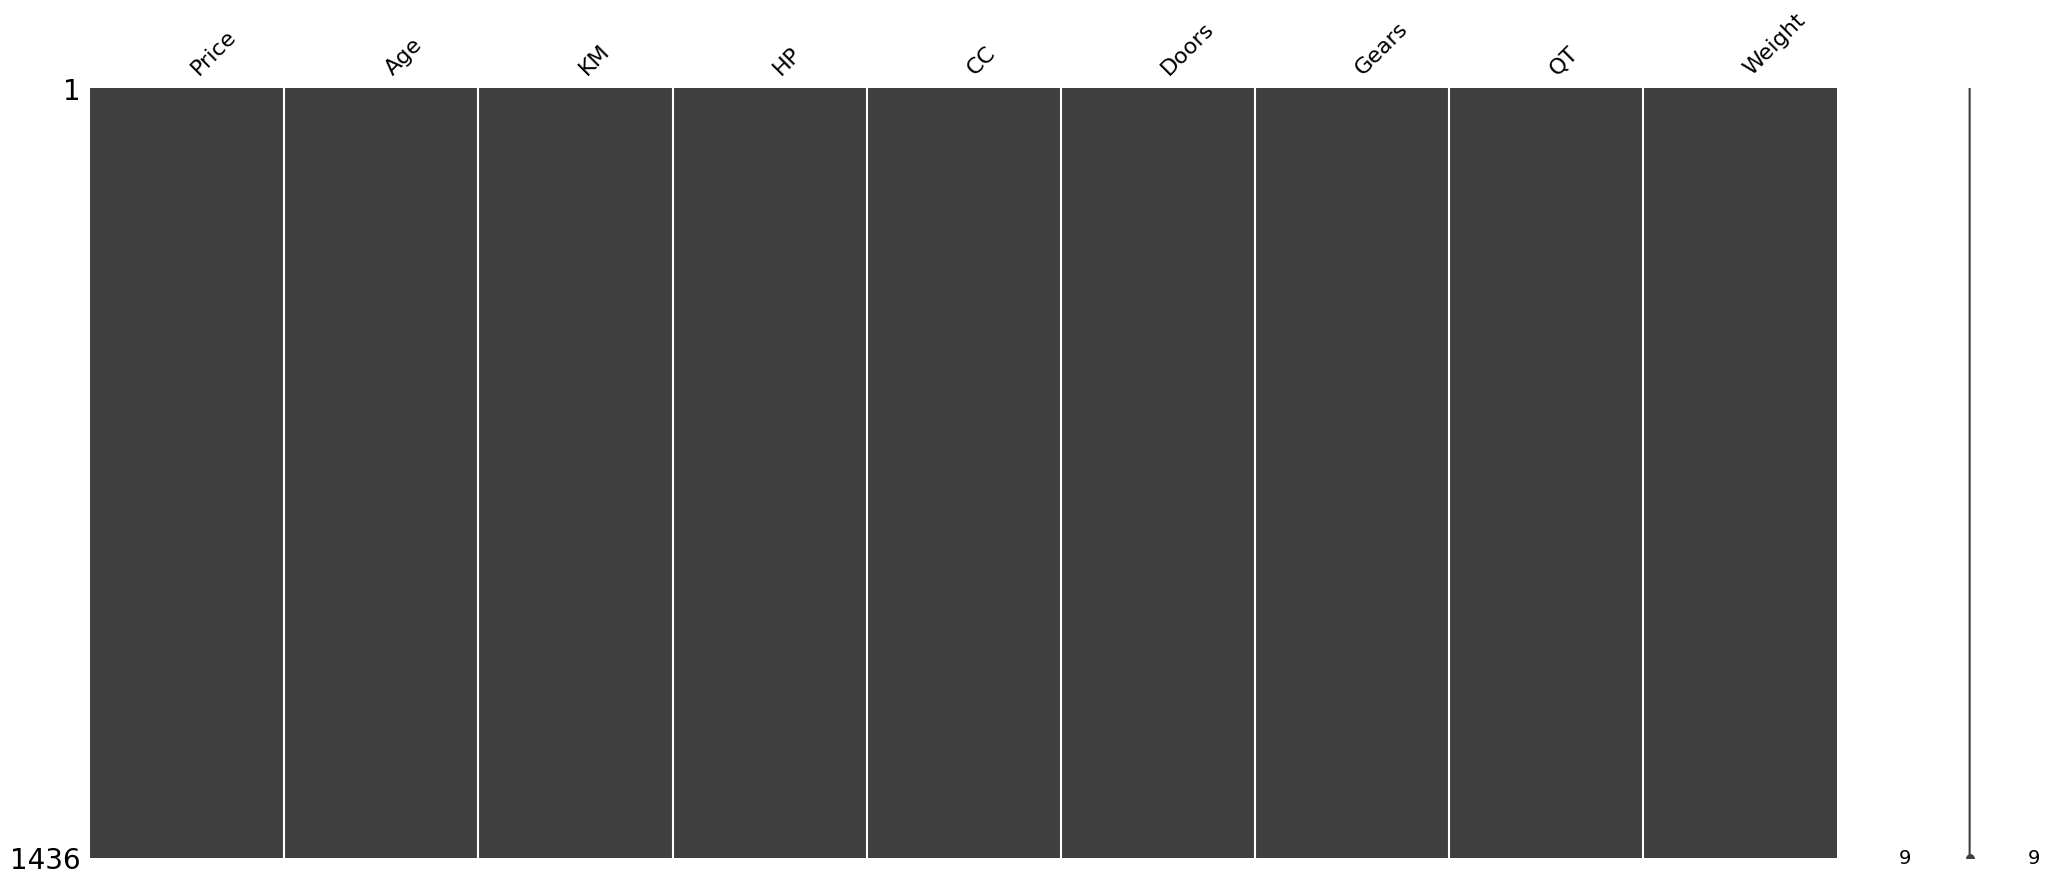

In [14]:
mn.matrix(data)

**Observation:** After checking above there is no null value present in the dataset.

# Checking for Duplicated Values

In [15]:
data[data.duplicated()].shape

(1, 9)

In [16]:
data[data.duplicated()]

Price  Age     KM   HP    CC  Doors  Gears   QT  Weight
113  24950    8  13253  116  2000      5      5  234    1320

In [17]:
data = data.drop_duplicates().reset_index(drop = True)
data[data.duplicated()]

Empty DataFrame
Columns: [Price, Age, KM, HP, CC, Doors, Gears, QT, Weight]
Index: []

**Observation:**  There are duplicated values in the dataset.

* Hence, we dropped those values.

# Let's find how many discrete and continuous feature are their in our dataset by seperating them in variables.

In [18]:
discrete_feature = [feature for feature in data.columns if len(data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 5


In [19]:
continuous_feature = [feature for feature in data.columns if data[feature].dtype!='0' and feature not in discrete_feature]
print('Continous Feature Count: {}'.format(len(continuous_feature)))

Continous Feature Count: 4


# Exploratory Data Analysis

# Visualizing the Distribution of Continuous Features with the help of Histograms and Probability Plot.

In [20]:
import pylab
def plot_data(data, feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature], dist = 'norm', plot = pylab)

Text(0.5, 1.0, 'Weight')

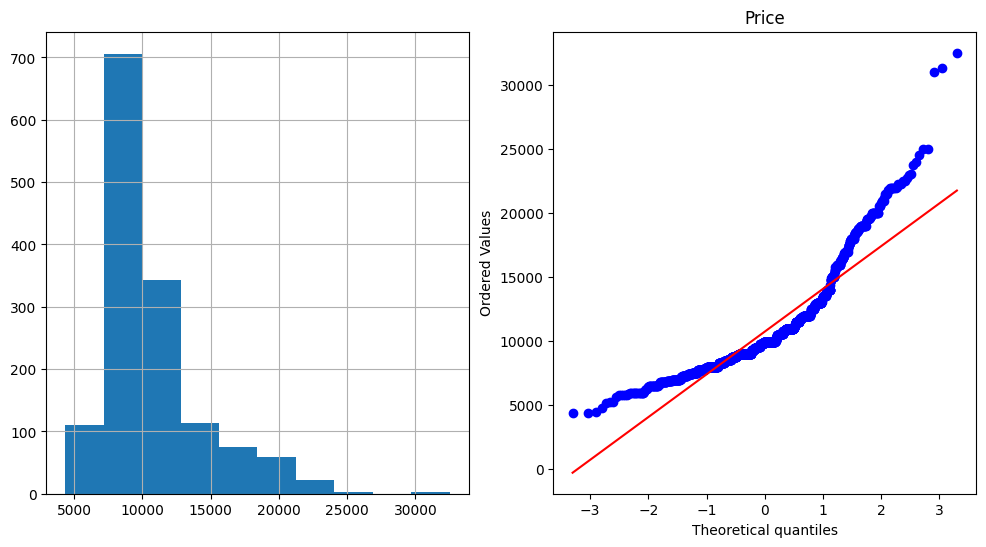

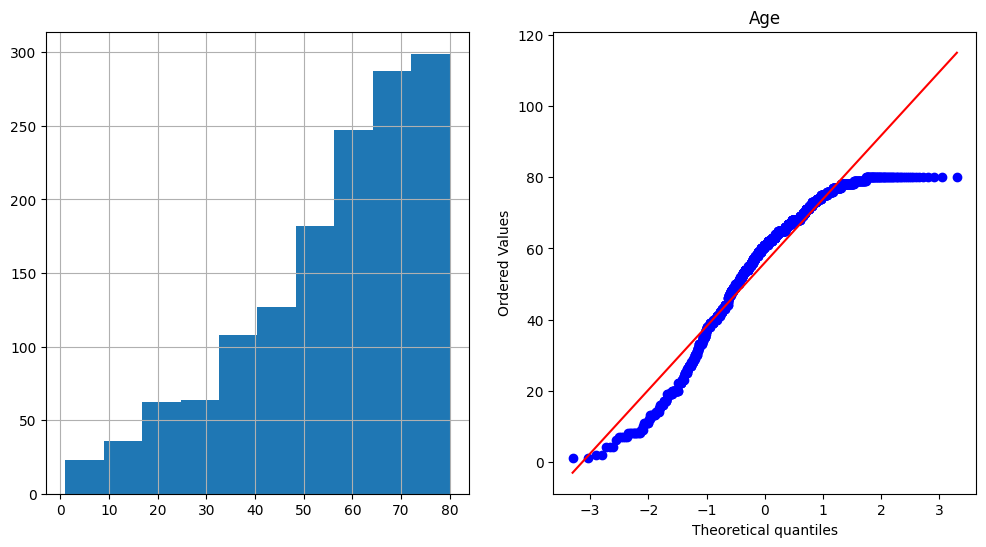

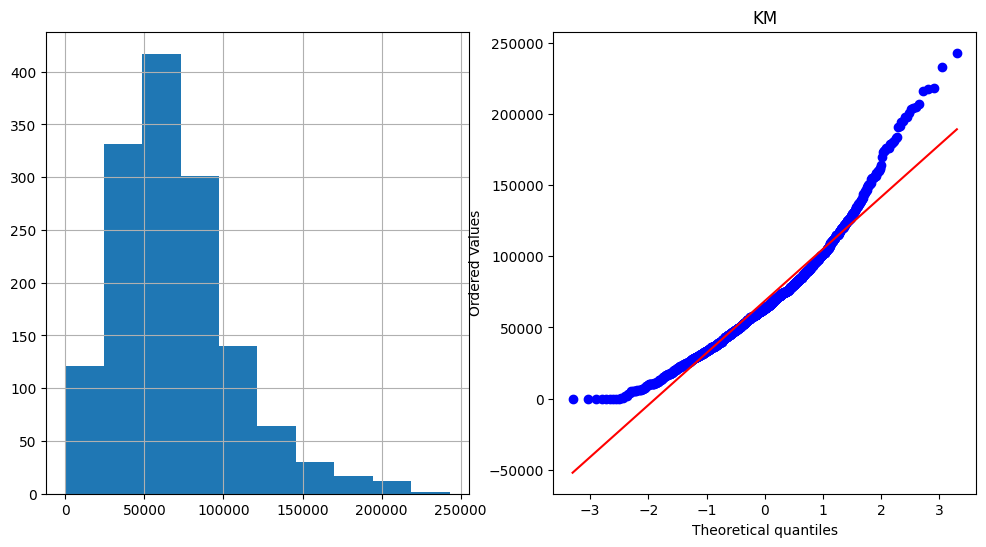

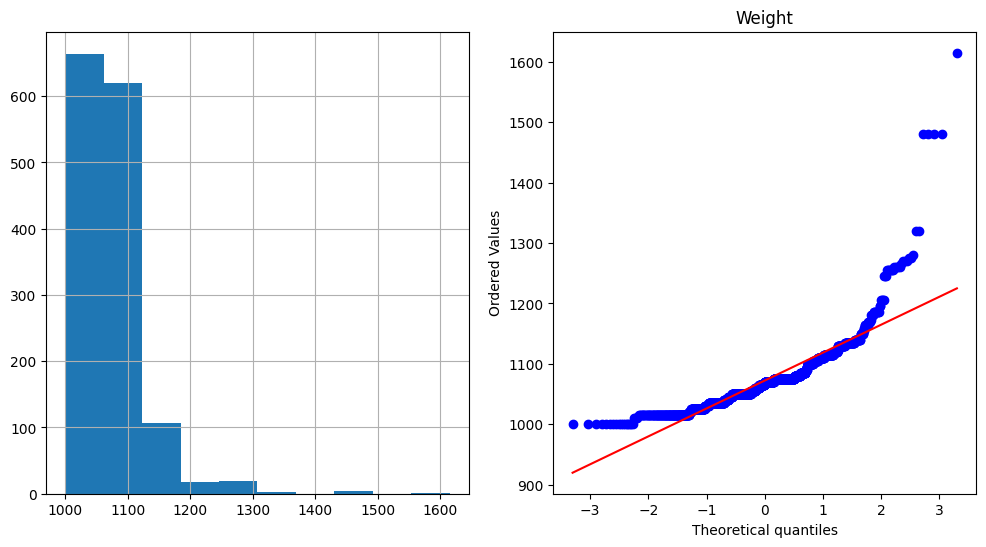

In [21]:
plot_data(data, 'Price')
plt.title('Price')
plot_data(data, 'Age')
plt.title('Age')
plot_data(data, 'KM')
plt.title('KM')
plot_data(data, 'Weight')
plt.title('Weight')

# Log transformation and visuaizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

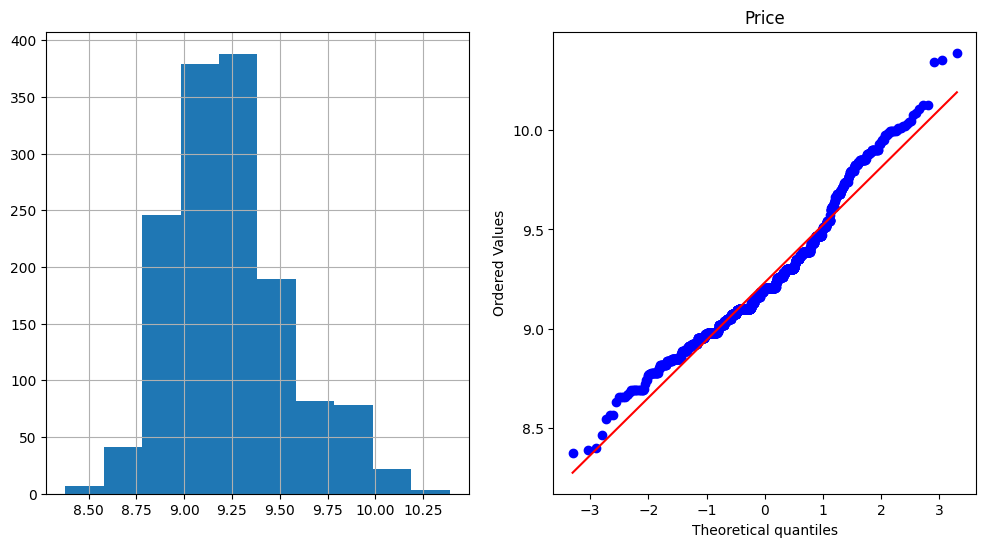

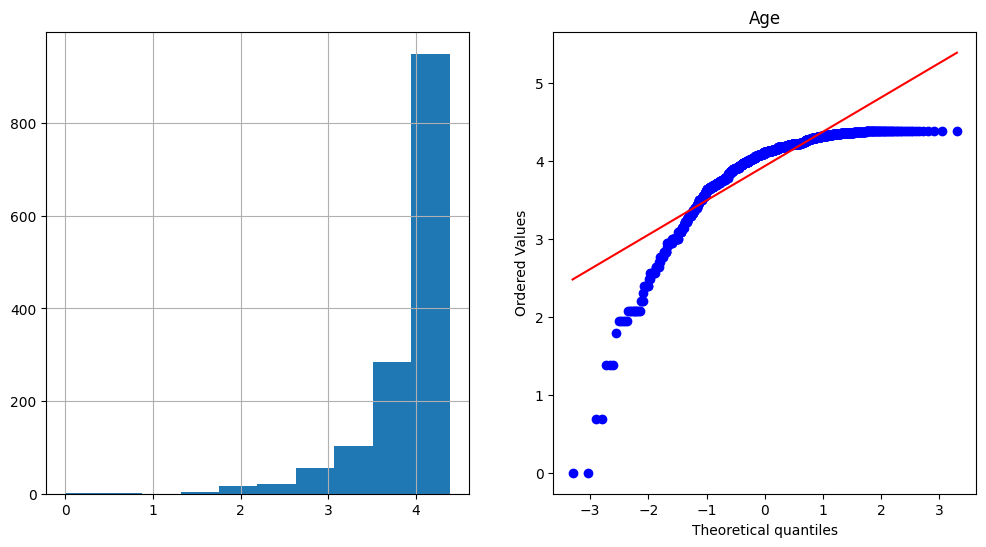

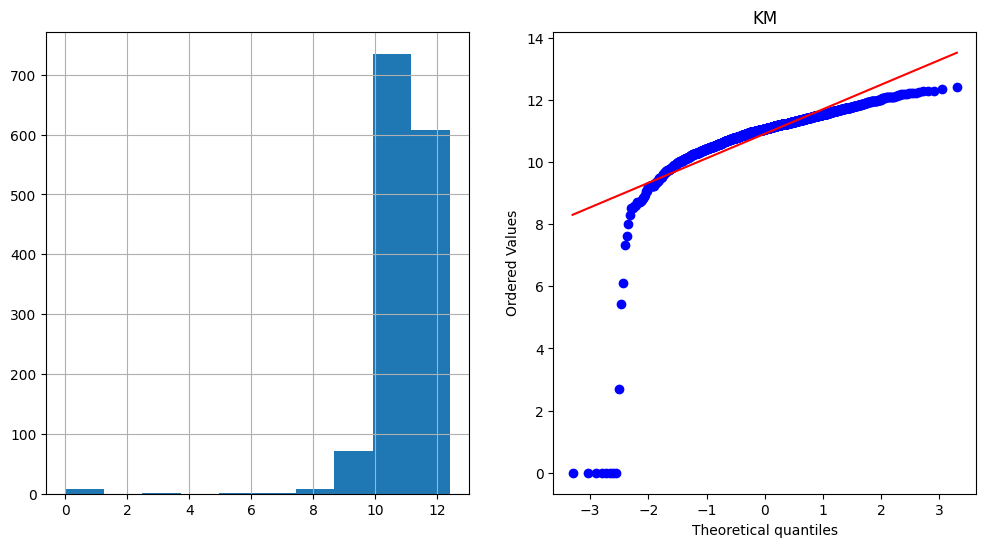

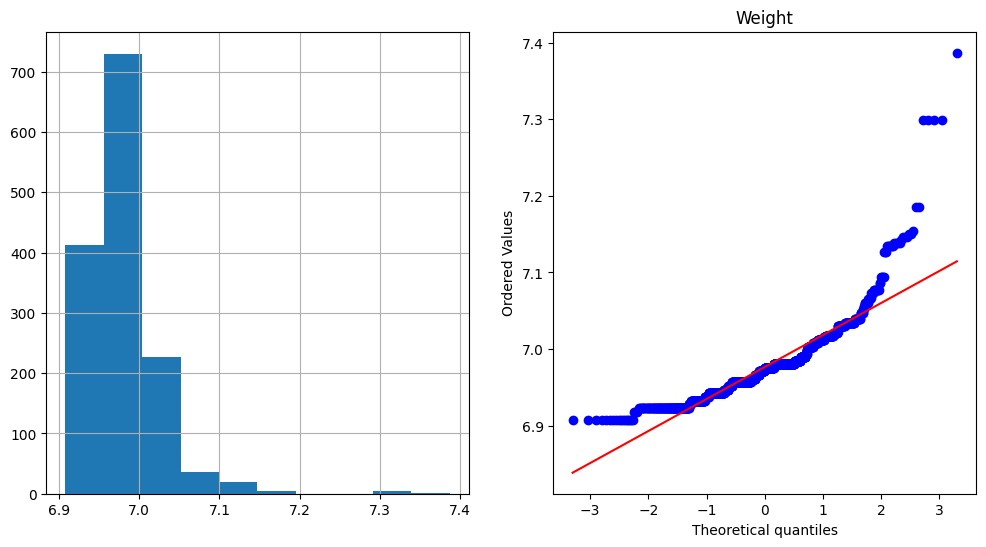

In [22]:
data1 = data.copy()
data1[continuous_feature]=np.log(data1[continuous_feature])

plot_data(data1, 'Price')
plt.title('Price')
plot_data(data1, 'Age')
plt.title('Age')
plot_data(data1, 'KM')
plt.title('KM')
plot_data(data1, 'Weight')
plt.title('Weight')

# Square root transformation and visualing the Histogram to determine any possible changes in distribution.

Text(0.5, 1.0, 'Weight')

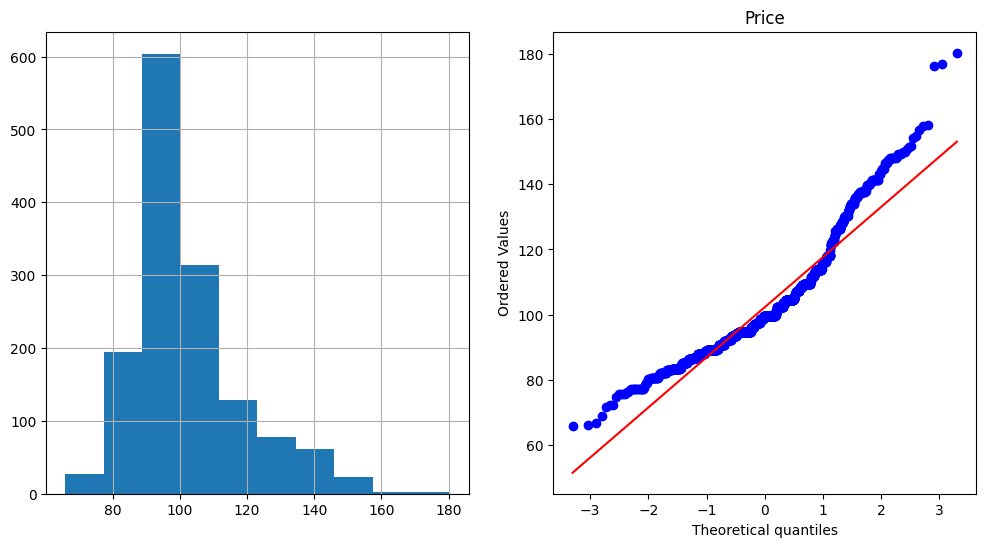

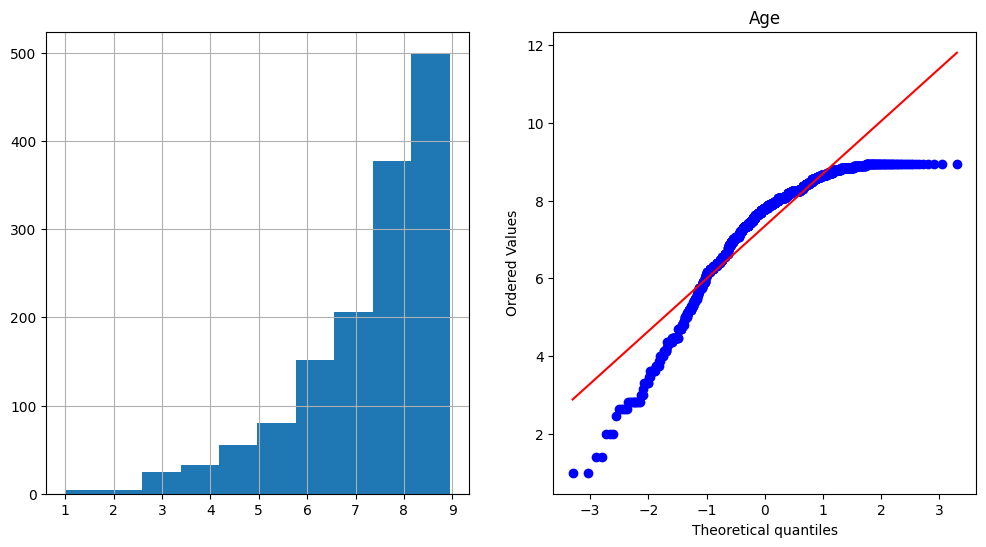

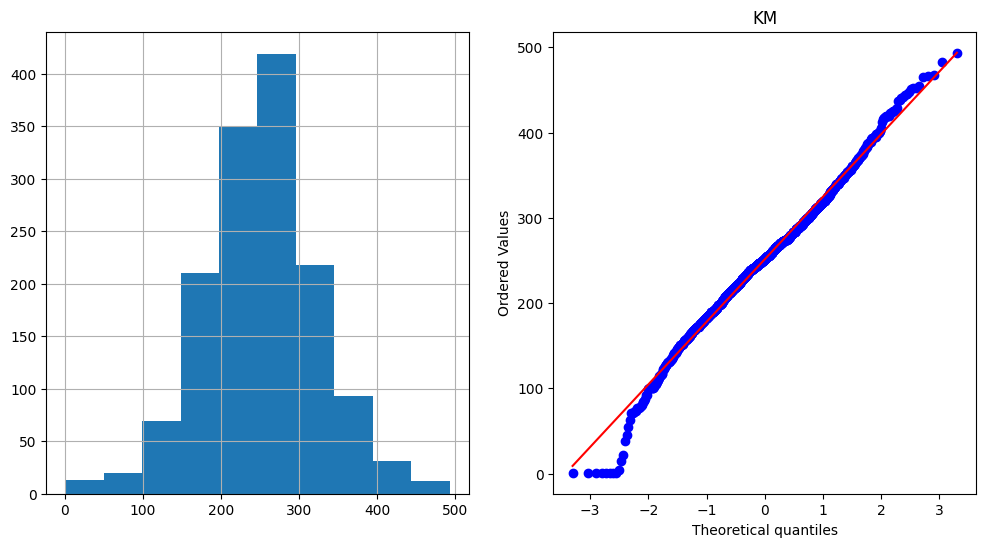

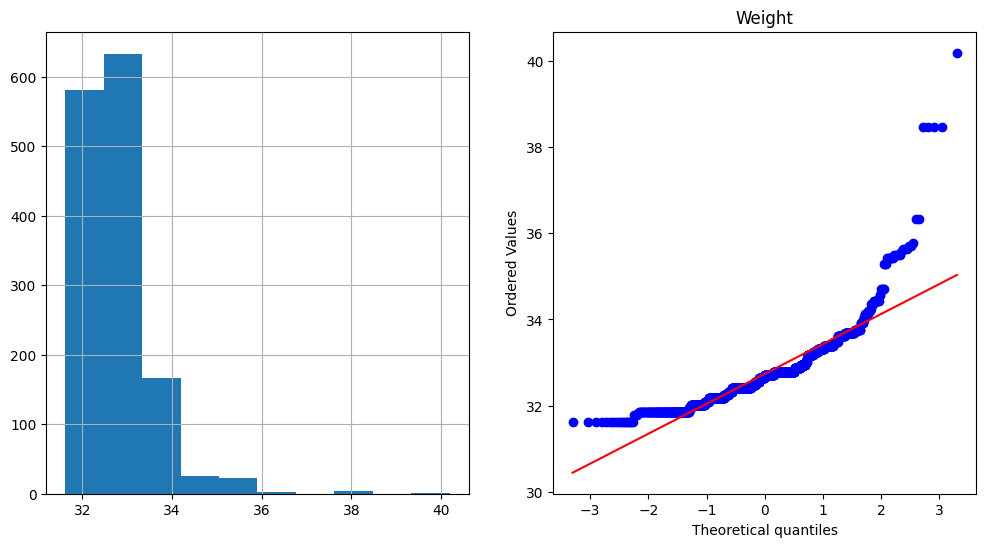

In [23]:
data1 = data.copy()
data1[continuous_feature]=np.sqrt(data1[continuous_feature])

plot_data(data1, 'Price')
plt.title('Price')
plot_data(data1, 'Age')
plt.title('Age')
plot_data(data1, 'KM')
plt.title('KM')
plot_data(data1, 'Weight')
plt.title('Weight')

# Cuberoot transformation and visualizing the Histogram to determine any possible changes in distribution

Text(0.5, 1.0, 'Weight')

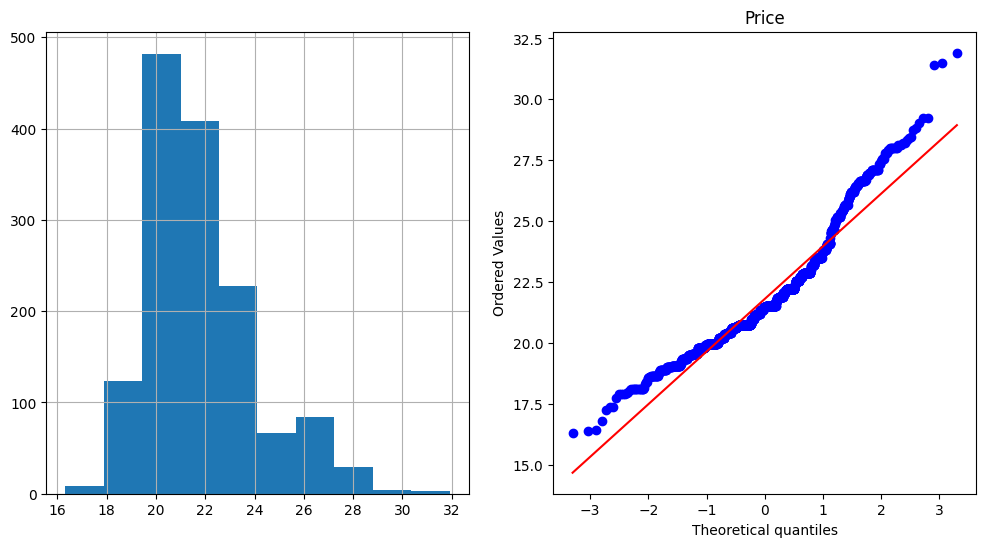

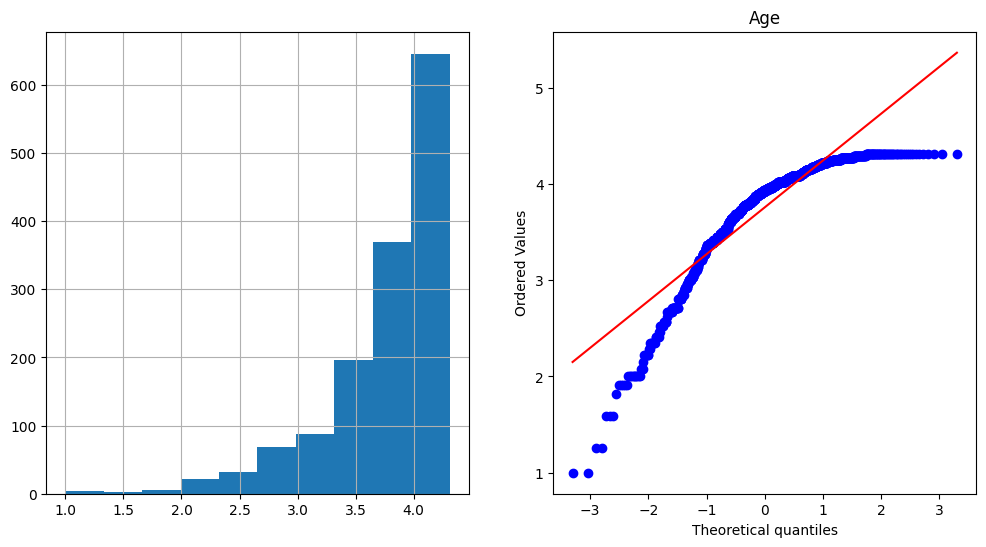

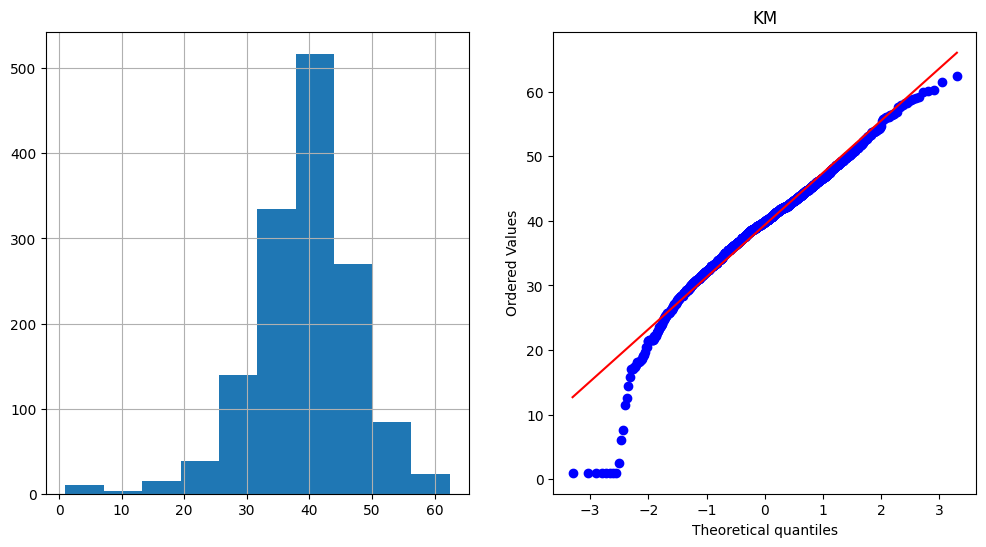

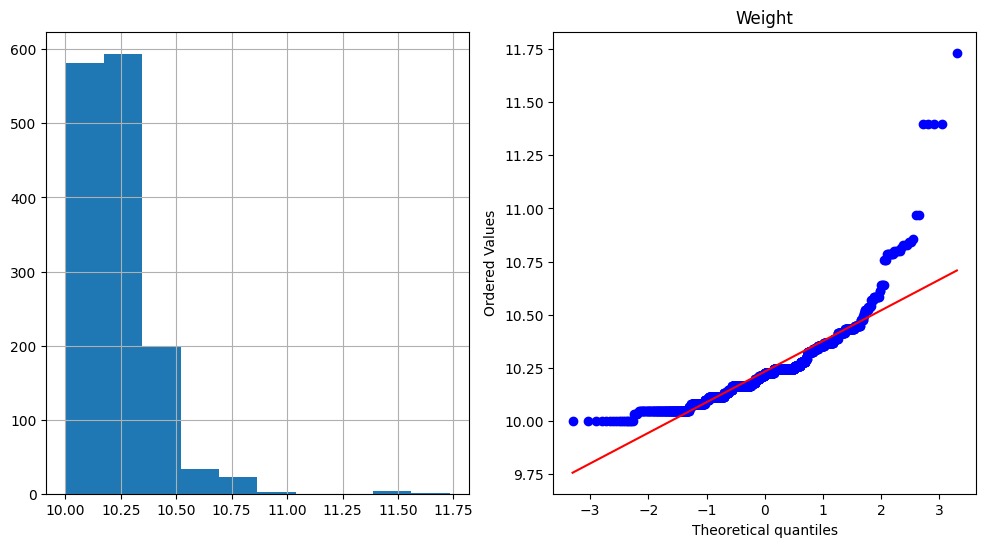

In [24]:
data1 = data.copy()
data1[continuous_feature]=np.cbrt(data1[continuous_feature])

plot_data(data1, 'Price')
plt.title('Price')
plot_data(data1, 'Age')
plt.title('Age')
plot_data(data1, 'KM')
plt.title('KM')
plot_data(data1, 'Weight')
plt.title('Weight')

* **Note:** Most of the Continuous Features visually do not look normally distributed lets have some Hypothetical test to check the normality.


# The Shapiro-Wilk test is a test of normality.  It is used to determine whether or not a sample comes from a normal distribution.

* To perform a Shapiro-Wilk test in Python we can use the scipy.stats.shapiro() function which takes on the following syntax:

In [25]:
data1.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [26]:
from scipy.stats import shapiro

# perform Shapirio-Wilk test
print("Price feature", shapiro(data.Price), '\n'
        "Age feature", shapiro(data.Age), '\n'
        "Weight feature", shapiro(data.Weight), '\n'
        "KM feature", shapiro(data.KM))

Price feature ShapiroResult(statistic=0.8534729480743408, pvalue=1.5960294063332542e-34) 
Age feature ShapiroResult(statistic=0.926694929599762, pvalue=6.738004885543532e-26) 
Weight feature ShapiroResult(statistic=0.7825542688369751, pvalue=5.042796731627146e-40) 
KM feature ShapiroResult(statistic=0.9475831389427185, pvalue=3.444094263209402e-22)


**Observation:**  Since the p-values are less than .05, we reject the null hypothesis.

* We have sufficient evidence to say that the sample data does not come from a normal distribution.

# Visualizing the Relation between each independent Feature with respect to the Dependent Feature.

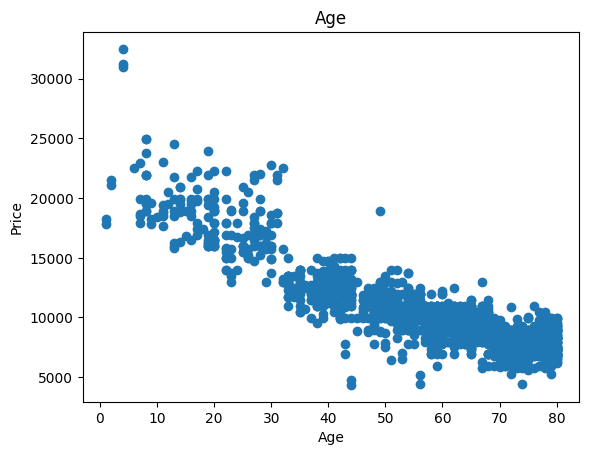

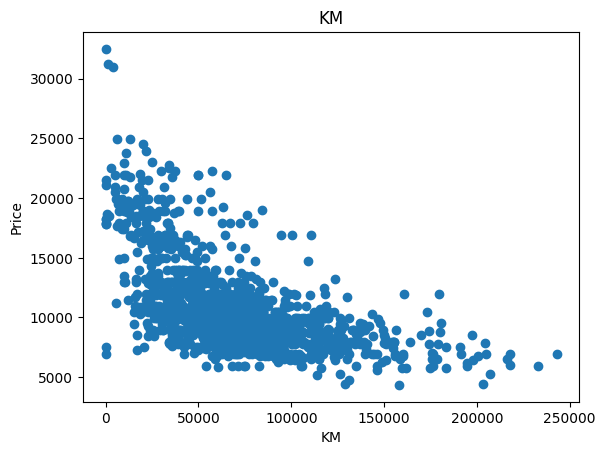

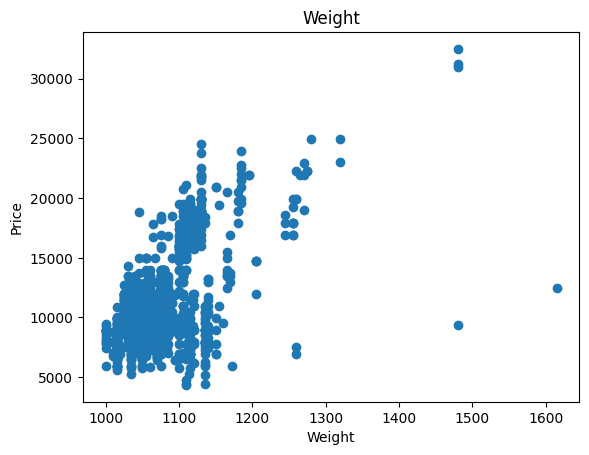

In [27]:
for feature in continuous_feature:
    if feature!="Price":
       data1 = data.copy()
       plt.scatter(data1[feature], data1['Price'])
       plt.xlabel(feature)
       plt.ylabel("Price")
       plt.title(feature)
       plt.show()

**Observation:** Age feature has a good linear relation with Price a Negative Correlation as compare to other features.


# Let's analyze the relationship between the discrete variables and Price

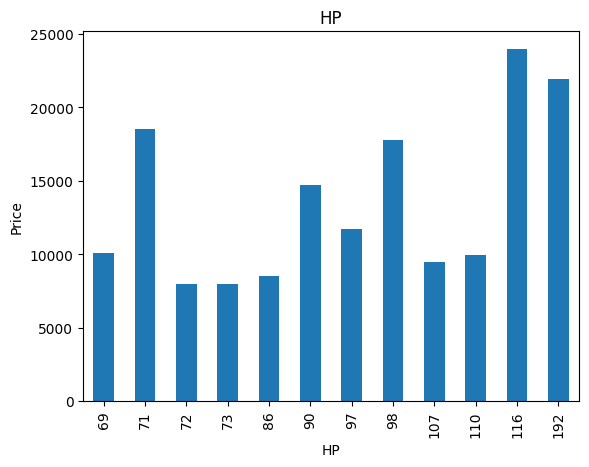

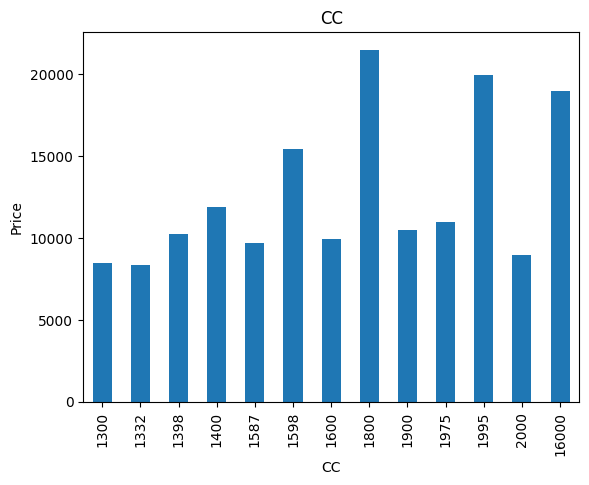

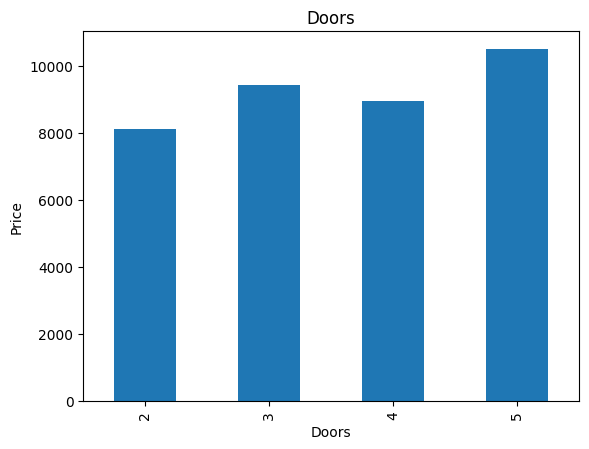

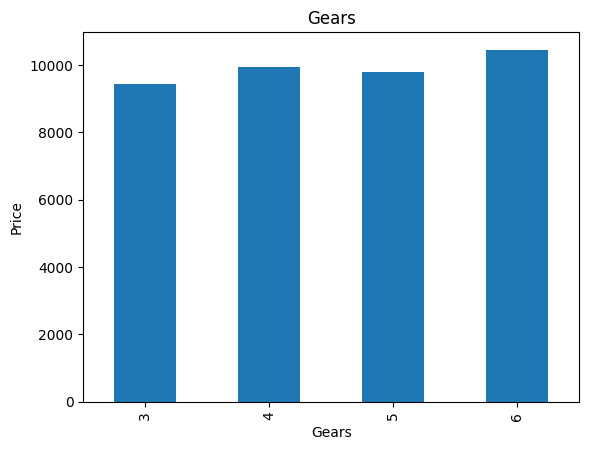

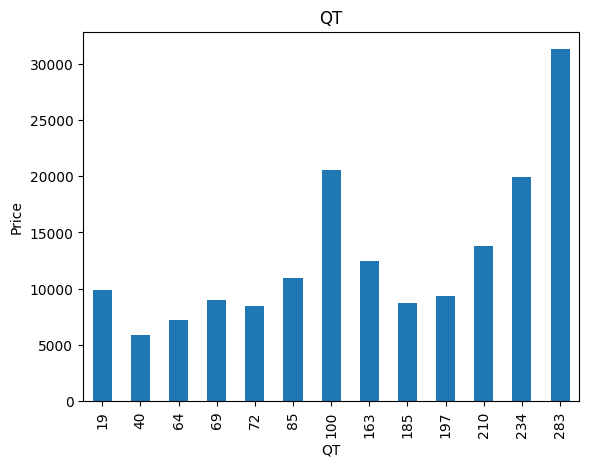

In [28]:
for feature in discrete_feature:
    data1 = data.copy()
    data1.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

**Observation:**  There isn't much of difference between how much Gears and Doors each Car has to have a significan amount of changes in Price from each other and there isn't any direct relation.

# Visualizing Continuous Data Types for Outlier Detection

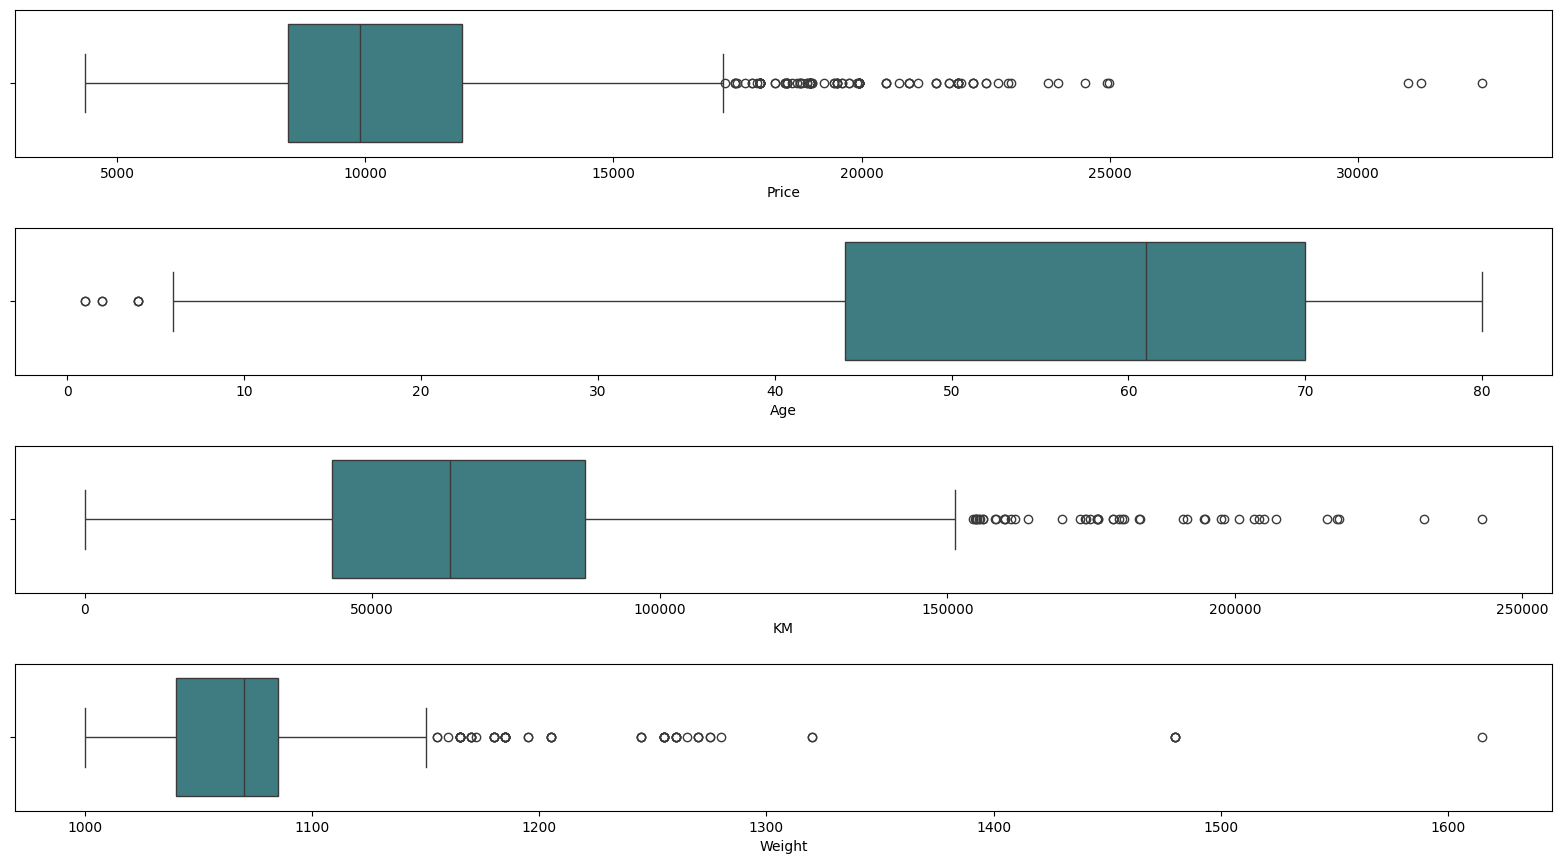

In [29]:
data1 = data.copy()
fig, axes = plt.subplots(4,1, figsize =(16,9), sharex = False, sharey = False)
sns.boxplot(x = 'Price', data = data1, palette = 'crest', ax=axes[0])
sns.boxplot(x = 'Age', data = data1, palette = 'crest', ax=axes[1])
sns.boxplot(x = 'KM', data = data1, palette = 'crest', ax=axes[2])
sns.boxplot(x = 'Weight', data = data1, palette = 'crest', ax=axes[3])
plt.tight_layout(pad = 2.0)

**Observation:**  A significant amount of outliers are present in each continuous feature

**Note:**

* **We can't simply remove the outliers that would mean loss of information.**
* **We need to try different types of transformation or imputation and select the one with the best results**
* **NOTE: Transforming variables can also eliminate outliers.  The Transformed Variables reduces the variation caused by the extreme values**

Before handling Ouliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for out case.

# Let's try Median Imputation to handle Outlier in Profit

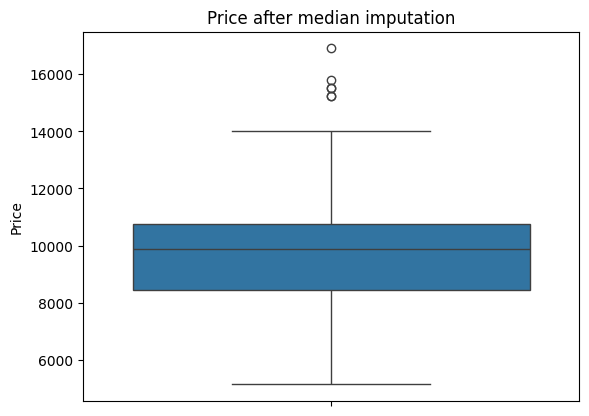

In [30]:
data2 = data.copy()
for  i in data['Price']:
  q1 = np.quantile(data2.Price, 0.25)
  q3 = np.quantile(data2.Price, 0.75)
  med = np.median(data2.Price)
  iqr = q3 - q1
  upper_bound = q3 + (1.5*iqr)
  lower_bound = q1 - (1.5*iqr)
  if i > upper_bound or i < lower_bound:
     data2['Price'] = data2['Price'].replace(i, np.median(data2['Price']))
sns.boxplot(data2['Price'])
plt.title('Price after median imputation')
plt.show()

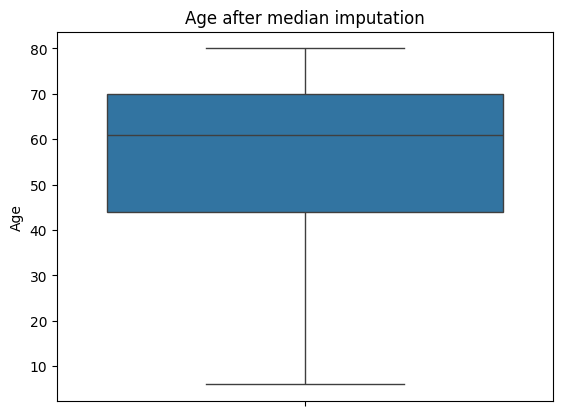

In [31]:
for i in data['Age']:
    q1 = np.quantile(data2.Age,0.25)
    q3 = np.quantile(data2.Age,0.75)
    med = np.median(data2.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        data2['Age'] = data2['Age'].replace(i, np.median(data2['Age']))
sns.boxplot(data2['Age'])
plt.title('Age after median imputation')
plt.show()

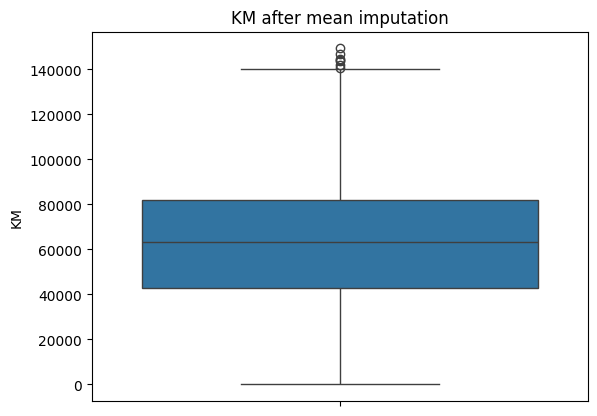

In [32]:
for i in data['KM']:
  q1 = np.quantile(data2.KM, 0.25)
  q3 = np.quantile(data2.KM, 0.75)
  med = np.median(data2.KM)
  iqr = q3 - q1
  upper_bound = q3 + (1.5 * iqr)
  lower_bound = q1 - (1.5 * iqr)
  if i > upper_bound or i < lower_bound:
    data2['KM'] = data2['KM'].replace(i, np.mean(data2['KM']))
sns.boxplot(data2['KM'])
plt.title('KM after mean imputation')
plt.show()

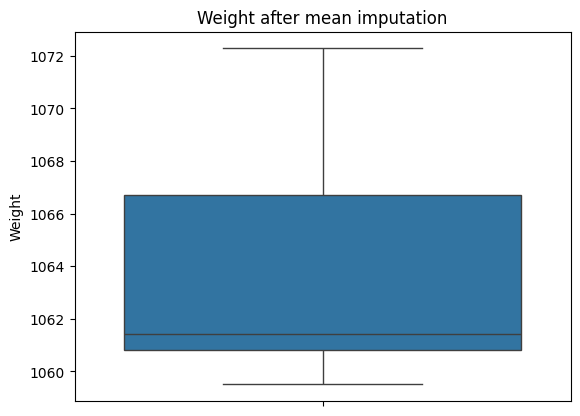

In [33]:
for i in data['Weight']:
    q1 = np.quantile(data2.Weight, 0.25)
    q3 = np.quantile(data2.Weight, 0.75)
    med = np.median(data2.Weight)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 + (1.5 * iqr)
    if i > upper_bound or i < lower_bound:
      data2['Weight'] = data2['Weight'].replace(i, np.mean(data2['Weight']))
sns.boxplot(data2['Weight'])
plt.title('Weight after mean imputation')
plt.show()

# Let's test our data  in model and find th eR-squared with mean imputation data model

In [34]:
after_mean_imputation_model = smf.ols('Price~Age+KM+Weight', data = data2).fit()
 # Finding rsquared values
after_mean_imputation_model.rsquared , after_mean_imputation_model.rsquared_adj

(0.36160489770165216, 0.36026654318949636)

**Observation:**  As you can see after mean imputation the model is not performing well.

* Now we have to try something else to get out better results than the raw data.

# The best thing we can do is now to remove the outlier and see the results.


In [35]:
data3 = data.copy()
def drop_outliers(data, field_name):
  iqr = 1.5 * (np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
  data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name],75))]. index, inplace=True)
  data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

Text(0.5, 1.0, 'Price after removing outliers')

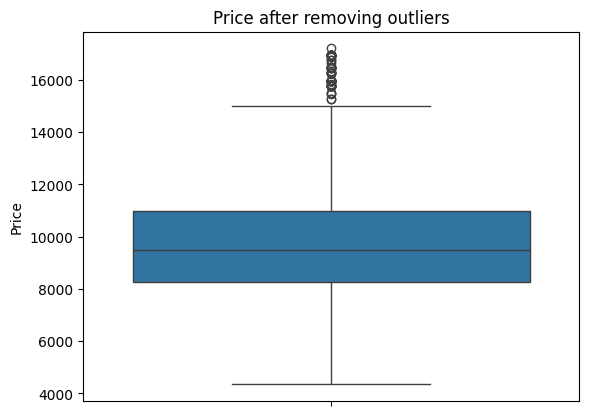

In [36]:
drop_outliers(data3, 'Price')
sns.boxplot(data3.Price)
plt.title('Price after removing outliers')

Text(0.5, 1.0, 'Age after removing outliers')

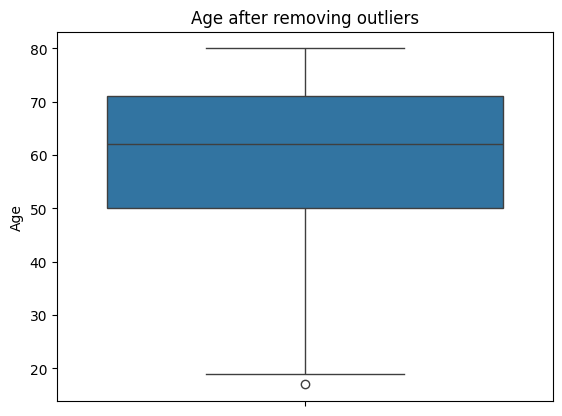

In [37]:
drop_outliers(data3, 'Age')
sns.boxplot(data3.Age)
plt.title('Age after removing outliers')

Text(0.5, 1.0, 'KM after removing outliers')

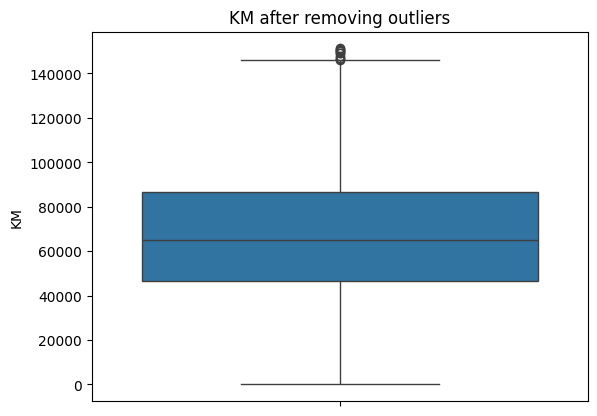

In [38]:
drop_outliers(data3, 'KM')
sns.boxplot(data3.KM)
plt.title('KM after removing outliers')

Text(0.5, 1.0, 'Weight after removing outliers')

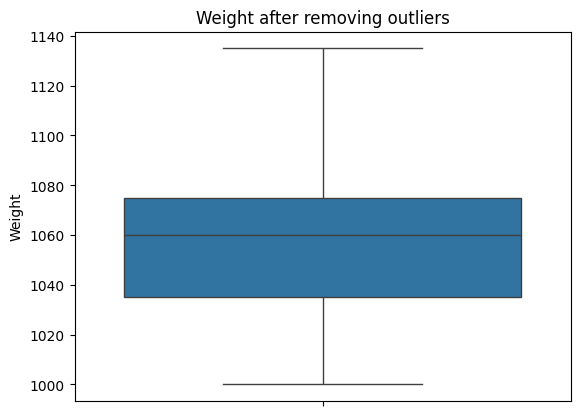

In [39]:
drop_outliers(data3, 'Weight')
sns.boxplot(data3.Weight)
plt.title('Weight after removing outliers')

# Let's test our data in model and compare the R-squared without imputation of data model

In [40]:
removed_outlier_model = smf.ols('Price~Age+KM+Weight', data = data3).fit()
# Finding rsquared values
removed_outlier_model.rsquared, removed_outlier_model.rsquared_adj

(0.7776886294411589, 0.7771455234870249)

In [41]:
np.sqrt (removed_outlier_model.mse_resid)

1060.0301342603996

# Let's try log transformaition and visualize the result first

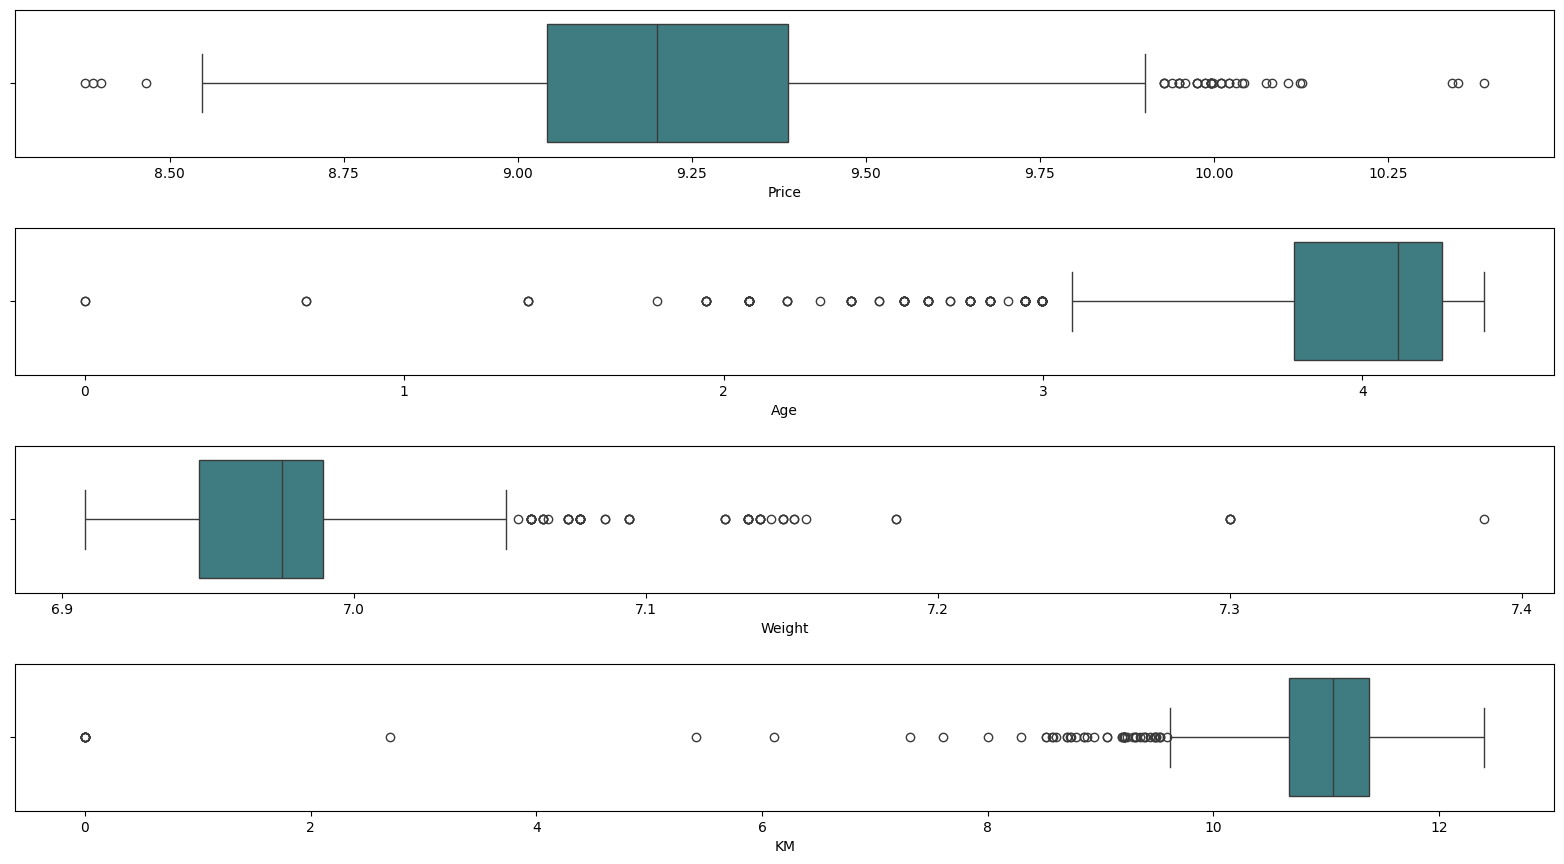

In [42]:
data1 = data.copy()
data1[continuous_feature] = np.log(data1[continuous_feature])

fig, axes = plt.subplots(4, 1, figsize=(16, 9), sharex=False, sharey=False)
sns.boxplot(x='Price', data=data1, palette='crest', ax=axes[0])
sns.boxplot(x='Age', data=data1, palette='crest', ax=axes[1])
sns.boxplot(x ='Weight', data= data1, palette = 'crest', ax=axes[2])
sns.boxplot(x ='KM', data= data1, palette = 'crest', ax=axes[3])
plt.tight_layout(pad=2.0)

In [43]:
log_transfomed = data.copy()
log_transfomed[continuous_feature] = np.log(log_transfomed[continuous_feature])
log_transfomed_model = smf.ols("Price~Age+KM+Weight", data = log_transfomed).fit()
# Finding rsquared values
log_transfomed_model.rsquared, log_transfomed_model.rsquared_adj

(0.7069873404282618, 0.70637305812308)


**Observation:** The outliers are still present

# Let's try cuberoot transformation and visualize the result first

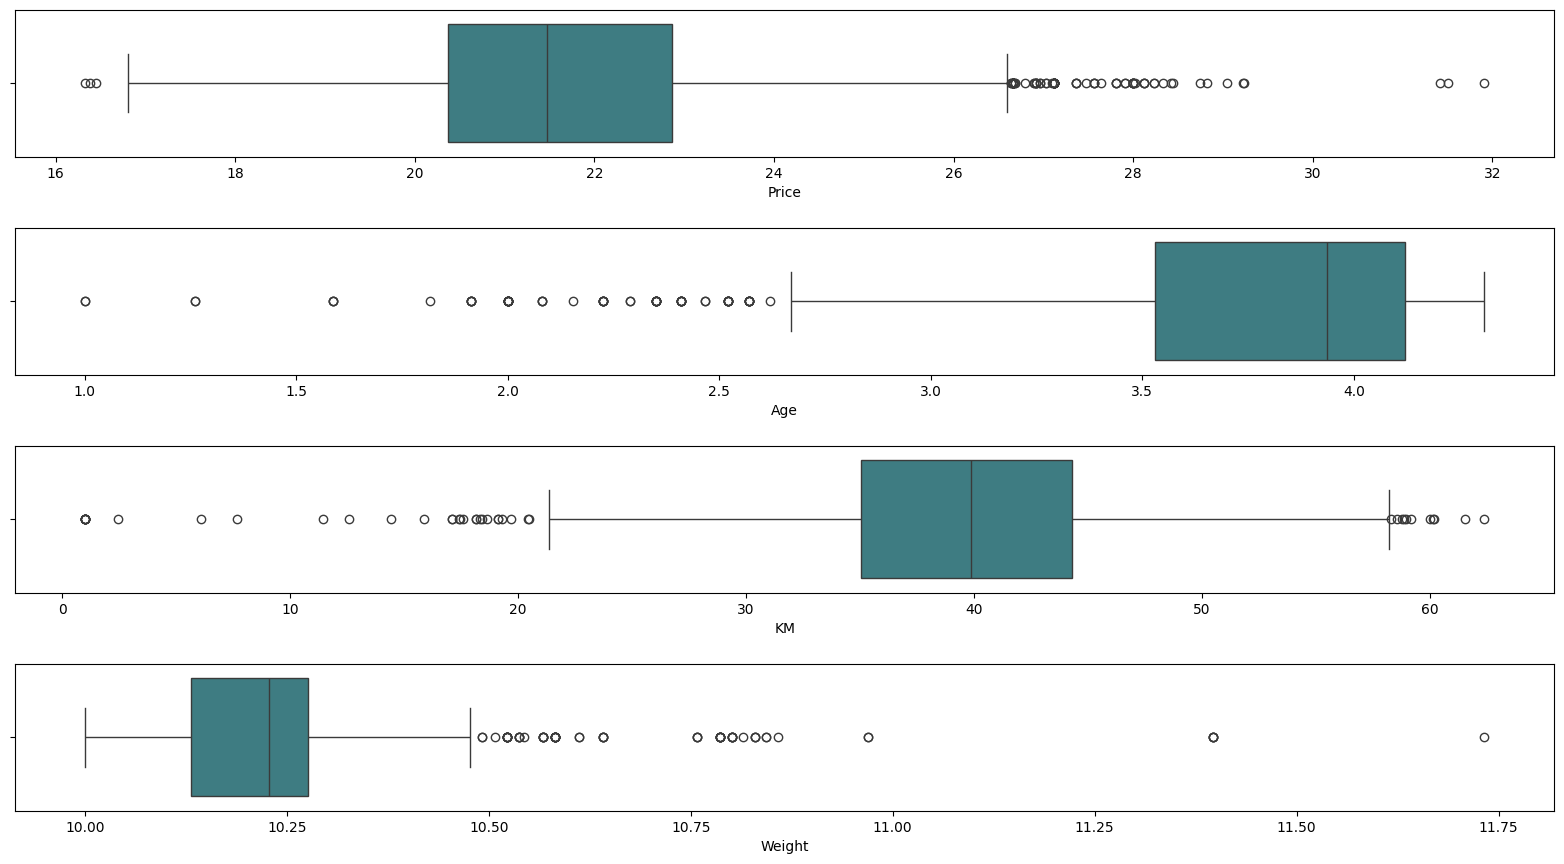

In [44]:
data1 = data.copy()
data1[continuous_feature] = np.cbrt(data[continuous_feature])

fig, axes = plt.subplots(4,1, figsize = (16,9), sharex=False, sharey=False)
sns.boxplot(x='Price', data = data1, palette='crest', ax=axes[0])
sns.boxplot(x='Age', data = data1, palette='crest', ax=axes[1])
sns.boxplot(x='KM', data = data1, palette='crest', ax=axes[2])
sns.boxplot(x='Weight', data = data1, palette='crest', ax=axes[3])
plt.tight_layout(pad = 2.0)

In [45]:
cube_root_transfomed = data.copy()
cube_root_transfomed[continuous_feature] = np.cbrt(cube_root_transfomed[continuous_feature])
cube_root_transfomed_model = smf.ols('Price~Age+KM+Weight', data = cube_root_transfomed).fit()

# Finding rsquared vlaues
cube_root_transfomed_model.rsquared , cube_root_transfomed_model.rsquared_adj

(0.8146046800585907, 0.8142160106247512)

**Observation:** After removing Outliers are still present.

**Observation:**  After removing Outliers the model performed very poorly than the raw data model.

* **Note:** WE will continue with different technique to deal with that raw data model.

# Raw data model

In [46]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [47]:
raw_data_model = smf.ols('Price~Age+KM+Weight+HP+CC+Gears+QT+Doors' , data= data).fit()
# Finding rsquared values
raw_data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:06:59   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
np.sqrt(raw_data_model.mse_resid)

1341.8046186938675

# Detecting Influencers / Outliers in the Model

* Two Techniques: 1. Cook's Distance & 2. Leverage value

In [49]:
influence_points=raw_data_model.get_influence()
c,  p_value = influence_points.cooks_distance

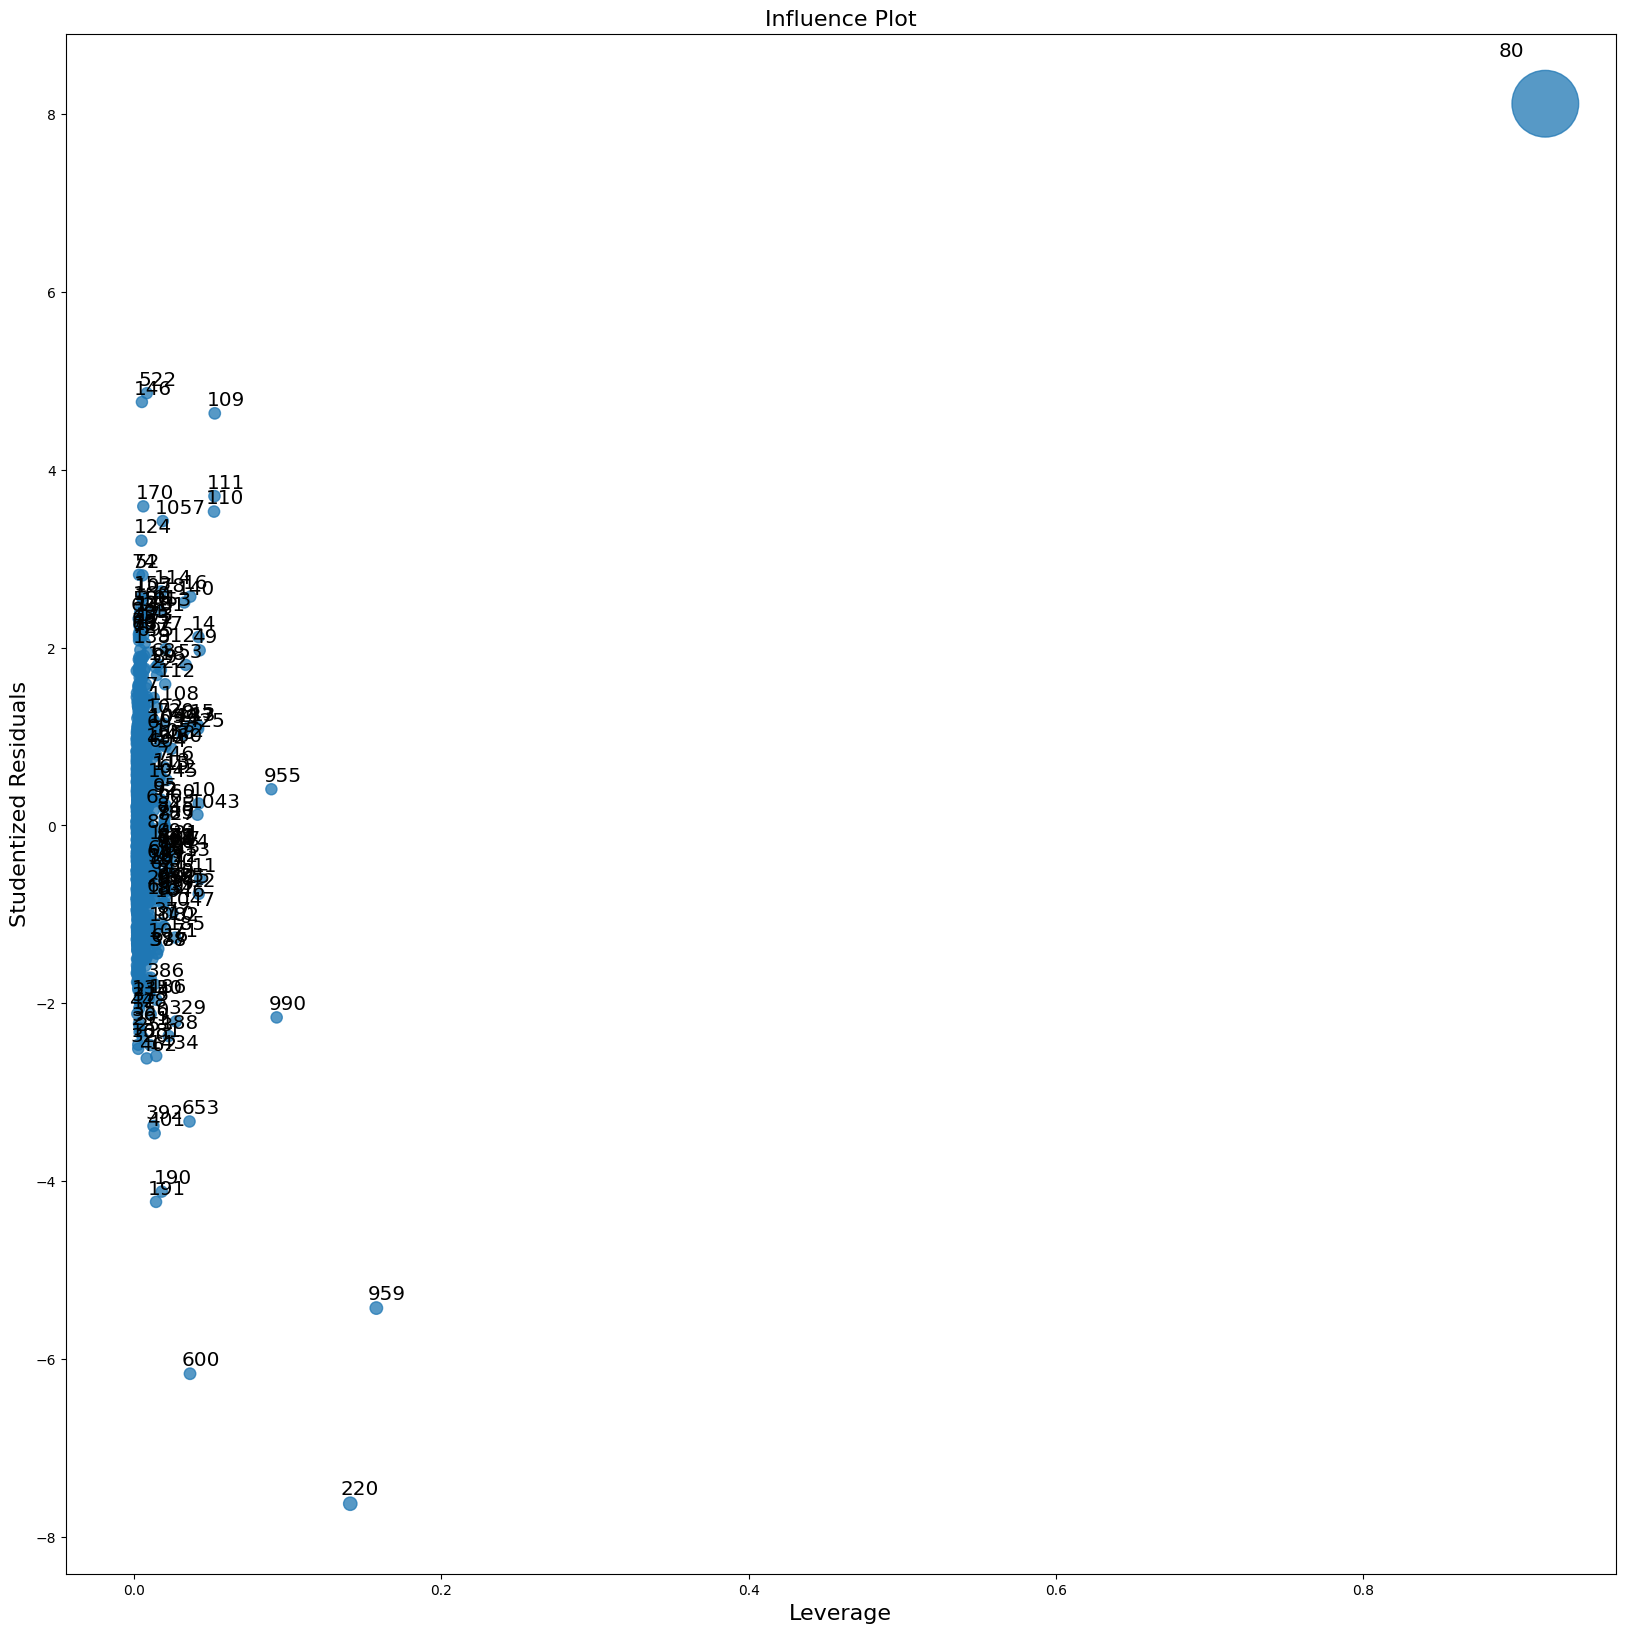

In [50]:
fig, ax= plt.subplots(figsize =(20,20))
fig = influence_plot(raw_data_model,ax= ax)
plt.show()


# Leverage Cutoff Value = 3*(k+1)/n

k = no.of features/columns & n = no.of datapoints

In [51]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at', np.round(leverage_cutoff,2))


Cut-off line at 0.02


# Let's plot the influncers and also plot a cut off line using the stem plot

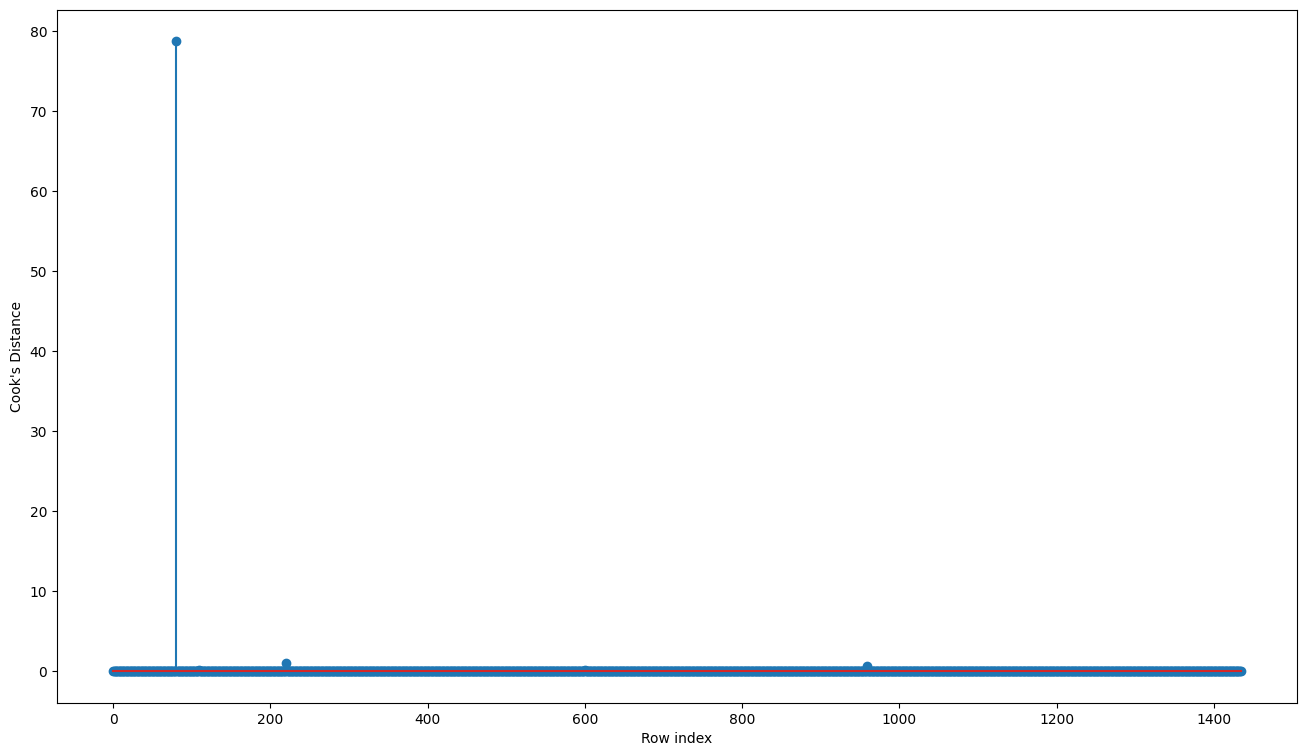

In [52]:
fig = plt.figure(figsize = (16,9))
x = [0,48]
y = [0.1,0.1]
plt.plot(x, y, color= 'darkblue', linewidth = 2)
y1 = [0.05,0.05]
plt.plot(x, y1, color = 'blue', linewidth =2)
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [53]:
# Index and value of influencer where C>0.5
np.argmax(c), np.max(c)

(80, 78.72950582254224)

In [54]:
data[data.index.isin([80])]

Price  Age     KM   HP     CC  Doors  Gears   QT  Weight
80  18950   25  20019  110  16000      5      5  100    1180

# Let's improve the model by deleting the influence point and creating a new dataframe

In [55]:
dataframe = data.copy()
# Discard the data points which are influencers and reassign the row number(reset_index(drop = True))
dataframe = dataframe.drop(dataframe.index[[80]], axis= 0).reset_index(drop = True)
dataframe.head()

Price  Age     KM  HP    CC  Doors  Gears   QT  Weight
0  13500   23  46986  90  2000      3      5  210    1165
1  13750   23  72937  90  2000      3      5  210    1165
2  13950   24  41711  90  2000      3      5  210    1165
3  14950   26  48000  90  2000      3      5  210    1165
4  13750   30  38500  90  2000      3      5  210    1170

In [56]:
data.shape

(1435, 9)

# Model Deletion Diagnostics and Final Model

In [58]:
# Another Method
k=dataframe.shape[1]
n=dataframe.shape[0]
leverage_cutoff = (3*(k+1))/n
while np.max(c)>leverage_cutoff:
    model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=dataframe).fit()
    (c,_)=model.get_influence().cooks_distance
    c = np.argmax(c), np.max(c)
    dataframe = dataframe.drop(dataframe.index[[np.argmax(c)]], axis=0).reset_index(drop=True)
    print('dataframe')
else:
    final_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=dataframe).fit()
    final_model.rsquared , final_model.aic
    print('Thus model accuracy is improved to', final_model.rsquared)

Thus model accuracy is improved to 0.29954088438363746


In [59]:
while raw_data_model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
      raw_data_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=dataframe).fit()
      (c,_)=raw_data_model.get_influence().cooks_distance
      c
      np.argmax(c),np.max(c)
      dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
      dataframe
    else:
      final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data=dataframe).fit()
      final_model.rsquared,final_model.aic
      print('Thus model accuracy is improved to', final_model.rsquared)

Thus model accuracy is improved to 0.2941762619062047
Thus model accuracy is improved to 0.30973813506714054
Thus model accuracy is improved to 0.30555779855374
Thus model accuracy is improved to 0.3190259978924487
Thus model accuracy is improved to 0.30935453024058035
Thus model accuracy is improved to 0.31181685708914486
Thus model accuracy is improved to 0.29927636900552235
Thus model accuracy is improved to 0.30943535598537875
Thus model accuracy is improved to 0.31040009372156807
Thus model accuracy is improved to 0.30525260486947037
Thus model accuracy is improved to 0.30966480892736203
Thus model accuracy is improved to 0.31582136916912806
Thus model accuracy is improved to 0.3242773187541701
Thus model accuracy is improved to 0.33020629127498724
Thus model accuracy is improved to 0.3305136912275831
Thus model accuracy is improved to 0.33350294691823057
Thus model accuracy is improved to 0.3371888478714602
Thus model accuracy is improved to 0.3401451486994189
Thus model accuracy

In [60]:
influenc_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

In [61]:
dataframe.shape

(136, 9)

In [62]:
dataframe.head()

Price  Age      KM  HP    CC  Doors  Gears   QT  Weight
0   9450   66   15110  86  1300      5      5   69    1035
1   6000   78  217764  72  2000      5      5  185    1135
2   6950   76  191620  72  2000      5      5  185    1150
3   6500   70  178800  72  2000      3      5  185    1115
4   6500   78  176000  86  1300      5      5   69    1035

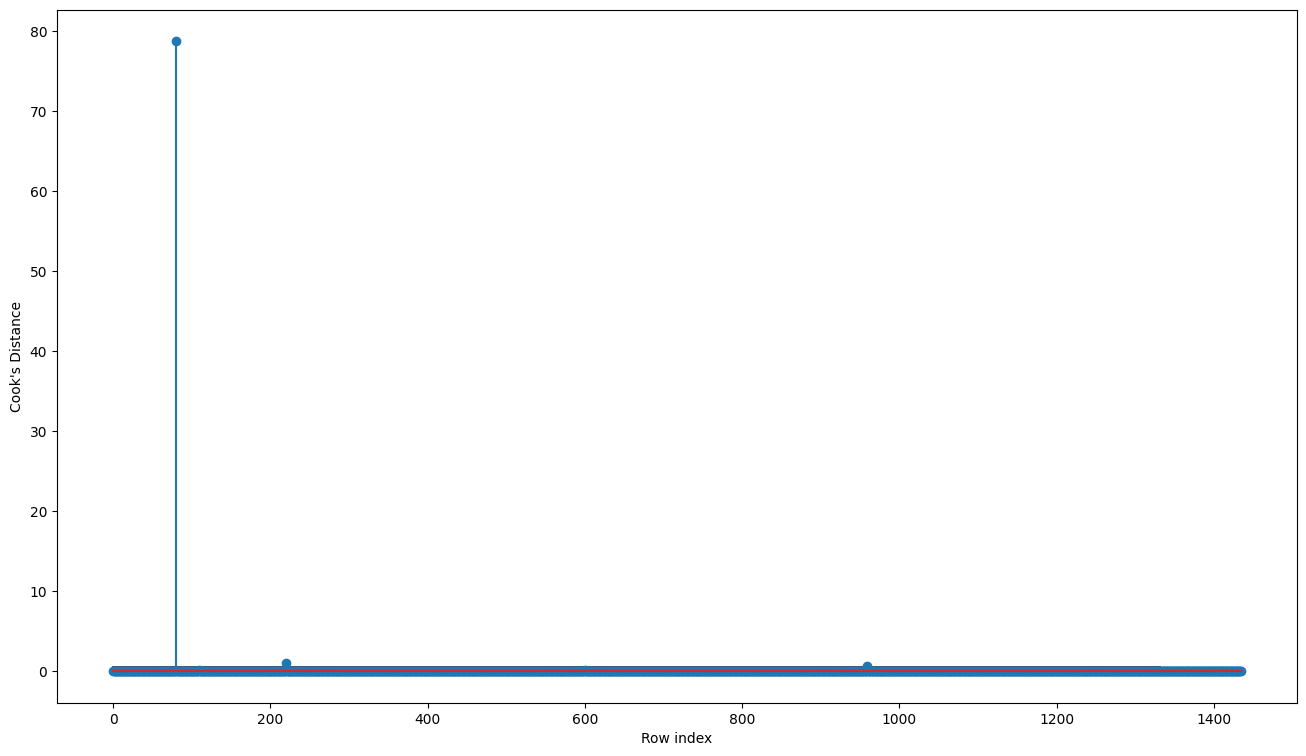

In [63]:
fig = plt.figure(figsize=(16,9))
x = [0,1330]
y = [0.5,0.5]
plt.plot(x,y, color = 'darkred', linewidth = 2)
y1 = [0.02,0.02]
plt.plot(x, y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(c)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

# **Observation:**  All the points are below our cut-off line

* Hence, we can say that there are no influcers present in our model we can preceed with the predictions

In [64]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     175.3
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           2.12e-62
Time:                        13:09:05   Log-Likelihood:                -914.44
No. Observations:                 136   AIC:                             1845.
Df Residuals:                     128   BIC:                             1868.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -736.2724     68.475    -10.752      0.000    -871.761    -600.784
Age          -90.8144      5.714    -15.892      0.000    -102.122     -79.507
KM            -0.0117      0.001    -17.471      0.000      -0.013      -0.010
HP           -19.8932      5.953     -3.342      0.001     -31.672      -8.115
CC            -0.3637      0.513     -0.709      0.480      -1.379       0.652
Doors        -52.0485     27.949     -1.862      0.065    -107.350       3.253
Gears      -3681.3620    342.373    -10.752      0.000   -4358.806   -3003.918
QT           -34.3826      4.283     -8.027      0.000     -42.858     -25.907
Weight        38.3025      2.013     19.023      0.000      34.319      42.286
==============================================================================
Omnibus:                       10.148   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.730
Skew:                          -0.211   Prob(JB):                       0.0940
Kurtosis:                       2.189   Cond. No.                     1.96e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.89e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
np.sqrt(final_model.mse_resid)

207.5101723496679

# Feature Engineering

Applying some Data Transformation to increase the linear relaationship and import our model prediction as well it scores

# Log-Transformation

In [66]:
data1_log_scaled = pd.DataFrame()
data1_log_scaled['Age']=np.log(dataframe.Age)
data1_log_scaled['Price']=np.log(dataframe.Price)
data1_log_scaled['KM']=np.log(dataframe.KM)
data1_log_scaled['Weight']=np.log(dataframe.Weight)
data1_log_scaled['CC']=dataframe['CC']
data1_log_scaled['Doors']=dataframe['Doors']
data1_log_scaled['HP']=dataframe['HP']
data1_log_scaled.head()

Age     Price         KM    Weight    CC  Doors  HP
0  4.189655  9.153770   9.623112  6.942157  1300      5  86
1  4.356709  8.699515  12.291167  7.034388  2000      5  72
2  4.330733  8.846497  12.163270  7.047517  2000      5  72
3  4.248495  8.779557  12.094023  7.016610  2000      3  72
4  4.356709  8.779557  12.078239  6.942157  1300      5  86

In [67]:
log_transformed_model = smf.ols('Price~Age+KM+HP+CC+Doors+Weight', data = data1_log_scaled).fit()
# Finding rsquared values for Log transformation
log_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     111.3
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           1.50e-48
Time:                        13:09:30   Log-Likelihood:                 267.64
No. Observations:                 136   AIC:                            -521.3
Df Residuals:                     129   BIC:                            -500.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.4554      2.021     -6.659      0.000     -17.453      -9.458
Age           -0.8333      0.071    -11.680      0.000      -0.974      -0.692
KM            -0.0980      0.008    -12.142      0.000      -0.114      -0.082
HP             0.0041      0.000     13.475      0.000       0.004       0.005
CC            -0.0005   4.28e-05    -12.694      0.000      -0.001      -0.000
Doors         -0.0172      0.004     -3.903      0.000      -0.026      -0.008
Weight         3.9667      0.296     13.412      0.000       3.381       4.552
==============================================================================
Omnibus:                        7.268   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                3.361
Skew:                          -0.064   Prob(JB):                        0.186
Kurtosis:                       2.241   Cond. No.                     1.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Cube Root Transformation

In [68]:
data1_cbrt_scaled = pd.DataFrame()
data1_cbrt_scaled['Age'] = np.cbrt(dataframe.Age)
data1_cbrt_scaled['Price'] = np.cbrt(dataframe.Price)
data1_cbrt_scaled['KM'] = np.cbrt(dataframe.KM)
data1_cbrt_scaled['Weight'] = np.cbrt(dataframe.Weight)
data1_cbrt_scaled['CC'] = dataframe['CC']
data1_cbrt_scaled['QT'] = dataframe['QT']
data1_cbrt_scaled['Doors'] = dataframe['Doors']
data1_cbrt_scaled['Gears'] = dataframe['Gears']
data1_cbrt_scaled['HP'] = dataframe['HP']
data1_cbrt_scaled.head()

Age      Price         KM     Weight    CC   QT  Doors  Gears  HP
0  4.041240  21.141896  24.722259  10.115331  1300   69      5      5  86
1  4.272659  18.171206  60.162891  10.431144  2000  185      5      5  72
2  4.235824  19.083657  57.651898  10.476896  2000  185      5      5  72
3  4.121285  18.662556  56.336410  10.369511  2000  185      3      5  72
4  4.272659  18.662556  56.040787  10.115331  1300   69      5      5  86

In [69]:
cbrt_transformed_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data = data1_cbrt_scaled).fit()
# Finding rsquared values for Cube-Root transformation
cbrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     158.2
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           7.75e-60
Time:                        13:09:54   Log-Likelihood:                 41.305
No. Observations:                 136   AIC:                            -66.61
Df Residuals:                     128   BIC:                            -43.31
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2140      0.207    -10.720      0.000      -2.623      -1.805
Age           -3.9604      0.270    -14.695      0.000      -4.494      -3.427
KM            -0.0522      0.003    -16.283      0.000      -0.059      -0.046
HP            -0.0115      0.005     -2.191      0.030      -0.022      -0.001
CC            -0.0006      0.000     -1.317      0.190      -0.001       0.000
Doors         -0.0506      0.025     -2.046      0.043      -0.099      -0.002
Gears        -11.0700      1.033    -10.720      0.000     -13.113      -9.027
QT            -0.0280      0.004     -7.389      0.000      -0.035      -0.020
Weight         9.9179      0.552     17.954      0.000       8.825      11.011
==============================================================================
Omnibus:                       12.751   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                4.914
Skew:                          -0.158   Prob(JB):                       0.0857
Kurtosis:                       2.124   Cond. No.                     3.48e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.67e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Square-Root Transformation

In [70]:
data1_sqrt_scaled = pd.DataFrame()
data1_sqrt_scaled['Age'] = np.sqrt(dataframe.Age)
data1_sqrt_scaled['Price'] = np.sqrt(dataframe.Price)
data1_sqrt_scaled['KM'] = np.sqrt(dataframe.KM)
data1_sqrt_scaled['Weight'] = np.sqrt(dataframe.Weight)
data1_sqrt_scaled['CC'] = dataframe['CC']
data1_sqrt_scaled['QT'] = dataframe['QT']
data1_sqrt_scaled['Doors'] = dataframe['Doors']
data1_sqrt_scaled['Gears'] = dataframe['Gears']
data1_sqrt_scaled['HP'] = dataframe['HP']
data1_sqrt_scaled.head()

Age      Price          KM     Weight    CC   QT  Doors  Gears  HP
0  8.124038  97.211110  122.922740  32.171416  1300   69      5      5  86
1  8.831761  77.459667  466.651905  33.689761  2000  185      5      5  72
2  8.717798  83.366660  437.744218  33.911650  2000  185      5      5  72
3  8.366600  80.622577  422.847490  33.391616  2000  185      3      5  72
4  8.831761  80.622577  419.523539  32.171416  1300   69      5      5  86

In [71]:
sqrt_transformed_model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = data1_sqrt_scaled).fit()
# Finding rsquared values for Square-Root transformation
sqrt_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     167.5
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           2.95e-61
Time:                        13:10:04   Log-Likelihood:                -213.45
No. Observations:                 136   AIC:                             442.9
Df Residuals:                     128   BIC:                             466.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.4602      0.870    -10.879      0.000     -11.181      -7.740
Age           -8.6826      0.570    -15.234      0.000      -9.810      -7.555
KM            -0.0366      0.002    -16.914      0.000      -0.041      -0.032
HP            -0.0862      0.034     -2.525      0.013      -0.154      -0.019
CC            -0.0034      0.003     -1.154      0.250      -0.009       0.002
Doors         -0.3203      0.161     -1.989      0.049      -0.639      -0.002
Gears        -47.3008      4.348    -10.879      0.000     -55.904     -38.698
QT            -0.1891      0.025     -7.662      0.000      -0.238      -0.140
Weight        13.8840      0.752     18.453      0.000      12.395      15.373
==============================================================================
Omnibus:                       13.976   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.984
Skew:                          -0.129   Prob(JB):                       0.0827
Kurtosis:                       2.099   Cond. No.                     3.47e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.77e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Let's try Robust transformation

The Robust Scaler, as the name suggests is not sensitive to outliers.

 * This scaler removes the median from the data

 * Scales the data by the InterQuartile Range(IQR)

 The interquartile range can be defined as:

 IQR = Q3 - Q1

 Thus, the formula would be:

 x_scaled =(x-Q1) / (Q3 - Q1)


In [72]:
data1_robust_scaled = dataframe.copy()
columns = ['Price', 'Age', 'KM', 'Weight']
features = data1_robust_scaled[columns]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

data1_robust_scaled[columns] = scaler.fit_transform(features.values)
data1_robust_scaled.head()

Price  Age        KM  HP    CC  Doors  Gears   QT    Weight
0  1.490683 -1.8 -1.817581  86  1300      5      5   69 -0.428571
1 -1.937888  0.6  3.684836  72  2000      5      5  185  2.428571
2 -0.993789  0.2  2.974980  72  2000      5      5  185  2.857143
3 -1.440994 -1.0  2.626894  72  2000      3      5  185  1.857143
4 -1.440994  0.6  2.550869  86  1300      5      5   69 -0.428571

In [73]:
robust_transformed_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data= data1_robust_scaled).fit()
# Finding rsquared values for robust transformation
robust_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     175.3
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           2.12e-62
Time:                        13:10:17   Log-Likelihood:                 25.864
No. Observations:                 136   AIC:                            -35.73
Df Residuals:                     128   BIC:                            -12.43
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2046      0.016     12.438      0.000       0.172       0.237
Age           -0.4513      0.028    -15.892      0.000      -0.507      -0.395
KM            -0.4288      0.025    -17.471      0.000      -0.477      -0.380
HP            -0.0198      0.006     -3.342      0.001      -0.031      -0.008
CC            -0.0004      0.001     -0.709      0.480      -0.001       0.001
Doors         -0.0517      0.028     -1.862      0.065      -0.107       0.003
Gears          1.0229      0.082     12.438      0.000       0.860       1.186
QT            -0.0342      0.004     -8.027      0.000      -0.043      -0.026
Weight         1.3323      0.070     19.023      0.000       1.194       1.471
==============================================================================
Omnibus:                       10.148   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.730
Skew:                          -0.211   Prob(JB):                       0.0940
Kurtosis:                       2.189   Cond. No.                     3.39e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.81e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Applying Standard Scaler

* For each feature, the Standard Scaler scales the values such that the mean is 0 and standard deviation is 1 (or the variance).
* x_scaled = x - mean/std_dev
* However, Standard Scaler assumes that the distribution of the variable is normal.  Thus, in case, the variables are not normally distributed, we either choose a different scaler or first, convert the variables to normal distribution and then apply this scaler.


In [74]:
from sklearn.preprocessing import StandardScaler

col_names = dataframe.columns
features = dataframe[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
data1_standard_scaled = pd.DataFrame(features, columns = col_names)
data1_standard_scaled.head()

Price       Age        KM        HP        CC     Doors  Gears  \
0  2.315960 -2.809735 -2.161995 -1.263960 -1.379373  1.127623    0.0   
1 -2.950442  0.955033  4.153225 -2.405601  2.885944  1.127623    0.0   
2 -1.500273  0.327572  3.338510 -2.405601  2.885944  1.127623    0.0   
3 -2.187195 -1.554812  2.939006 -2.405601  2.885944 -0.973154    0.0   
4 -2.187195  0.955033  2.851751 -1.263960 -1.379373  1.127623    0.0   

         QT    Weight  
0 -0.460346 -0.756550  
1  4.802275  3.216069  
2  4.802275  3.811962  
3  4.802275  2.421545  
4 -0.460346 -0.756550

In [75]:
standard_scaler_transformed_model = smf.ols("Price~Age+HP+CC+Doors+Gears+QT+Weight", data = data1_standard_scaled).fit()
# Finding rsquared values for standard scaler transformation
standard_scaler_transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     45.76
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           1.15e-29
Time:                        13:10:29   Log-Likelihood:                -115.42
No. Observations:                 136   AIC:                             244.8
Df Residuals:                     129   BIC:                             265.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.463e-16      0.050  -4.95e-15      1.000      -0.098       0.098
Age           -0.4689      0.051     -9.218      0.000      -0.570      -0.368
HP             0.0730      0.199      0.367      0.714      -0.320       0.466
CC            -0.7118      0.226     -3.144      0.002      -1.160      -0.264
Doors         -0.1932      0.073     -2.632      0.010      -0.338      -0.048
Gears       4.919e-17   6.12e-18      8.044      0.000    3.71e-17    6.13e-17
QT            -0.9222      0.263     -3.507      0.001      -1.442      -0.402
Weight         1.5380      0.142     10.861      0.000       1.258       1.818
==============================================================================
Omnibus:                        1.512   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                1.260
Skew:                          -0.234   Prob(JB):                        0.533
Kurtosis:                       3.055   Cond. No.                     5.42e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Observation:**  After the transformation and building modles the R-Squared had varianc with respect to other transformations

* But standard scaler is better than raw data models with better AIC, BIC log-likelihood scores.
* We have to perform modle validation test to check which model is better will do at the end of this.


# For building Multi Linear Regression there are assumption regarding the data set.

They are as follows:-

1. <b>Fearure should be independent of each other there shouldn't be any dependencey upon each other.
2. <b>There shouldn't any other relation but Linear relation amongst model parameters  (Hyperparameters of the model the intercept and coefficient)
3. <b>Each Feature and Model Error (residuals) should be independent of each other
4. <b>Constant Variance (Homoscedasticity) in Error, it should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.
5. <b>There should be a linear relation between the dependent variable and Independent variables

We will check the above one by one

# Preparing a Model

In [76]:
model = smf.ols("Price~Age+KM+HP+CC+Doors+Gears+QT+Weight", data = data1_standard_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     175.3
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           2.12e-62
Time:                        13:10:38   Log-Likelihood:                -32.507
No. Observations:                 136   AIC:                             81.01
Df Residuals:                     128   BIC:                             104.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.463e-16      0.027  -9.07e-15      1.000      -0.054       0.054
Age           -0.4419      0.028    -15.892      0.000      -0.497      -0.387
KM            -0.5738      0.033    -17.471      0.000      -0.639      -0.509
HP            -0.3724      0.111     -3.342      0.001      -0.593      -0.152
CC            -0.0911      0.129     -0.709      0.480      -0.345       0.163
Doors         -0.0756      0.041     -1.862      0.065      -0.156       0.005
Gears       -1.78e-17   9.15e-19    -19.459      0.000   -1.96e-17    -1.6e-17
QT            -1.1569      0.144     -8.027      0.000      -1.442      -0.872
Weight         1.4718      0.077     19.023      0.000       1.319       1.625
==============================================================================
Omnibus:                       10.148   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.730
Skew:                          -0.211   Prob(JB):                       0.0940
Kurtosis:                       2.189   Cond. No.                     2.44e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.75e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* <b> Summary the value we are concerned with are:-
The coefficients and significance (p-values) R-squared F statistic and its significance
  1. <B> R-squared is 0.906 Meaning that 90.6% of the variance in cnt with registered

  2. <B> This is a decent R-squared value.
  
  3. <B> F statistic has a very low p value (practially low) Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

  **NOTE:**  If any of the above step is not followed our modle can't be a good predictor.


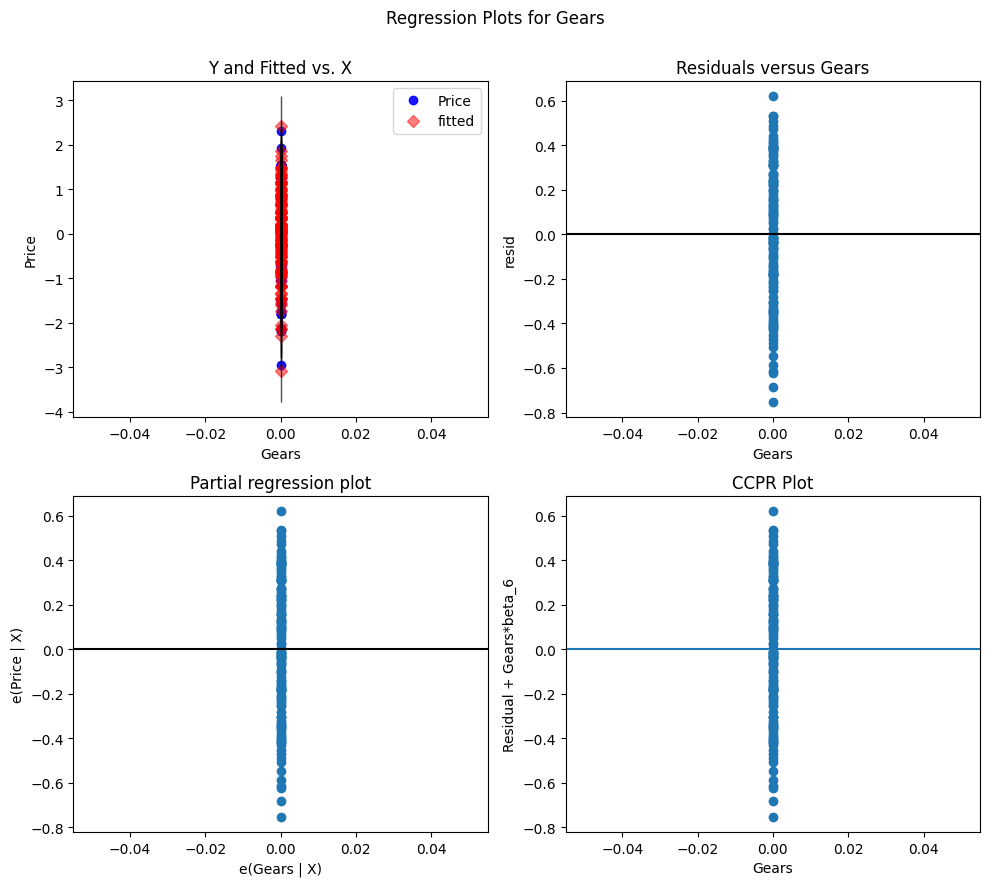

In [77]:
fig = plt.figure(figsize = (10,9))
sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

<B> Observation: No linear Relation found in QT Feature with the Dependent Feature.

# Model Testing

As Y = Beta0 + Beta1(X1) + Beta(X2) + Beta(X3) + .............+ Beta n(Xn)

Fining Coefficient Parameters ( Beta0 and Beta1's values)


Assumption for multi linear Regression fails
Feature should be independent of each other there shouldn't be any dependency upon each other.

Here,  (Intercept) Beta0 p_value ~ 1

Hypothesis testing of X variable by finding test_statistics and P_values for Beta if (P_value < α=0.05 ; Reject Null)

Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

**Observation:**  If the p-value is not less than .05 for Gears features, we fail to reject the null hypothesis.  We do not have sufficient evidence to say that the sample data providing those features dependency towards the dependent variable.

  * Looking at the p-values, it looks like some of the variables aren't really significant(in the presence of other variables).

  * Maybe we could drop some?

  * We could simply drop the variable with the highest, non-significant p value.  A better way would be to supplement this with the VIF information
  

# Let's Try another Test by Calculating VIF (Variance Inflation Factor)

* This helps to check the dependency among the features by building a model without the target and testing various combination among the features.

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
y = data1_standard_scaled.drop(['Price'], axis=1)
vif = pd.DataFrame()
vif['Features'] = y.columns
vif['VIF'] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
6       QT  28.15
3       CC  22.39
2       HP  16.83
7   Weight   8.11
4    Doors   2.24
1       KM   1.46
0      Age   1.05
5    Gears    NaN

In [79]:
r_sqr_age = smf.ols('Age~HP+Weight+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_age = 1/(1-r_sqr_age)
r_sqr_weight = smf.ols('Weight~HP+Age+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_weight = 1/(1-r_sqr_weight)
r_sqr_cc = smf.ols('CC~HP+Weight+Age+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_cc = 1/(1-r_sqr_cc)
r_sqr_hp = smf.ols('HP~Age+Weight+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_hp = 1/(1-r_sqr_hp)
r_sqr_qt = smf.ols('QT~HP+Weight+CC+Doors+Age+Gears+KM', dataframe).fit().rsquared
vif_qt = 1/(1-r_sqr_qt)
r_sqr_km = smf.ols('KM~HP+Weight+CC+Doors+QT+Gears+Age', dataframe).fit().rsquared
vif_km = 1/(1-r_sqr_km)
r_sqr_gears = smf.ols('Gears~HP+Weight+CC+Doors+QT+Age+KM', dataframe).fit().rsquared
vif_gears = 1/(1-r_sqr_gears)
r_sqr_doors = smf.ols('Doors~HP+Weight+CC+Age+QT+Gears+KM', dataframe).fit().rsquared
vif_doors = 1/(1-r_sqr_doors)

In [80]:
vif_frame = pd.DataFrame({'Variables':['Doors','HP','Weight','CC','Age','QT','Gears','KM'], 'VIF':[vif_doors,vif_hp,vif_weight,vif_cc,vif_age,vif_qt,vif_gears,vif_km]}, index = None)
vif_frame.set_index('Variables', inplace = True)
vif_frame.sort_values(by = 'VIF')

VIF
Variables           
Gears       0.000000
Age         1.047847
KM          1.462091
Doors       2.236108
Weight      8.113011
HP         16.829638
CC         22.393677
QT         28.152524

**Note:**  We generally want a VIF that is less than 5.  As you can see QT has the highest value among others lets investigate.

In [81]:
# Simple Linear Model using QT
qt_model = smf.ols("Price~QT", data = data1_standard_scaled).fit()
qt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     9.115
Date:                Mon, 05 Feb 2024   Prob (F-statistic):            0.00304
Time:                        13:11:15   Log-Likelihood:                -188.50
No. Observations:                 136   AIC:                             381.0
Df Residuals:                     134   BIC:                             386.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.561e-16      0.084  -1.87e-15      1.000      -0.165       0.165
QT            -0.2524      0.084     -3.019      0.003      -0.418      -0.087
==============================================================================
Omnibus:                        1.574   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.382
Skew:                          -0.098   Prob(JB):                        0.501
Kurtosis:                       2.546   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
gears_model = smf.ols("Price~Gears", data = data1_standard_scaled).fit()
gears_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 05 Feb 2024   Prob (F-statistic):                nan
Time:                        13:11:23   Log-Likelihood:                -192.98
No. Observations:                 136   AIC:                             388.0
Df Residuals:                     135   BIC:                             390.9
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.561e-16      0.086  -1.81e-15      1.000      -0.170       0.170
Gears               0          0        nan        nan           0           0
==============================================================================
Omnibus:                        1.466   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.480   Jarque-Bera (JB):                1.546
Skew:                          -0.229   Prob(JB):                        0.462
Kurtosis:                       2.750   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [83]:
gears_qt_model = smf.ols("Price~Gears+QT", data = data1_standard_scaled).fit()
gears_qt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     9.115
Date:                Mon, 05 Feb 2024   Prob (F-statistic):            0.00304
Time:                        13:11:28   Log-Likelihood:                -188.50
No. Observations:                 136   AIC:                             381.0
Df Residuals:                     134   BIC:                             386.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.245e-17      0.084  -7.47e-16      1.000      -0.165       0.165
Gears               0          0        nan        nan           0           0
QT            -0.2524      0.084     -3.019      0.003      -0.418      -0.087
==============================================================================
Omnibus:                        1.574   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.382
Skew:                          -0.098   Prob(JB):                        0.501
Kurtosis:                       2.546   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Significance level - Backward elimination
We have different techniques to find out the features which have the maximum effect on the output.

Here we are going to look at the Backward elimination.

In this process we need to add one column of ones in the starting of the column.

In backward elimination we delete the value one by one whose significance level is less.

i.e In general we have a P-value and a significance level

P_value = 1 - (minus) significane level

or in other terms

p_value+ significance level = 1

if P_value is high significance level is less.

Hence we will be deleating features one by one whose P_value is high which means it has less significance level.

By eliminating process we get to the values which are of most significance

#### Model1
+ Dropping the variable and updating the model
+ As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, Gears as it has a very high P Value of 0.75 in SLR and 0.12 in MLR has R square score of 0. Let's go ahead and drop this variable

In [84]:
# Dropping highly correlated variables and insignificant variables
x = data1_standard_scaled.drop(['Gears'], axis=1)
y = data1_standard_scaled.drop(['Gears','Price'], axis=1)

In [85]:
x.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'QT', 'Weight'], dtype='object')

In [86]:
model_1 = smf.ols("Price~Age+KM+HP+CC+Doors+QT+Weight", data = x).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     175.3
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           2.12e-62
Time:                        13:11:44   Log-Likelihood:                -32.507
No. Observations:                 136   AIC:                             81.01
Df Residuals:                     128   BIC:                             104.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.463e-16      0.027  -9.07e-15      1.000      -0.054       0.054
Age           -0.4419      0.028    -15.892      0.000      -0.497      -0.387
KM            -0.5738      0.033    -17.471      0.000      -0.639      -0.509
HP            -0.3724      0.111     -3.342      0.001      -0.593      -0.152
CC            -0.0911      0.129     -0.709      0.480      -0.345       0.163
Doors         -0.0756      0.041     -1.862      0.065      -0.156       0.005
QT            -1.1569      0.144     -8.027      0.000      -1.442      -0.872
Weight         1.4718      0.077     19.023      0.000       1.319       1.625
==============================================================================
Omnibus:                       10.148   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.730
Skew:                          -0.211   Prob(JB):                       0.0940
Kurtosis:                       2.189   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation:**  As our Multicollinearity problem has been solved

<B>Feature Selection in Machine Learning<B>


# Correlation Coefficient

Corellation is a measure of th elinear relationship of 2 or more variables.  Though correlation we can predict one variable from the other.  The logic behind using correlation for feature selection is that the good variables are highly correlated withe target.  Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two cariables are correlated, we can predict one from the other.  Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information.  We will use th ePerson Correlation here.

In [87]:
data.corr()

Price       Age        KM        HP        CC     Doors     Gears  \
Price   1.000000 -0.876273 -0.569420  0.314134  0.124375  0.183604  0.063831   
Age    -0.876273  1.000000  0.504575 -0.155293 -0.096549 -0.146929 -0.005629   
KM     -0.569420  0.504575  1.000000 -0.332904  0.103822 -0.035193  0.014890   
HP      0.314134 -0.155293 -0.332904  1.000000  0.035207  0.091803  0.209642   
CC      0.124375 -0.096549  0.103822  0.035207  1.000000  0.079254  0.014732   
Doors   0.183604 -0.146929 -0.035193  0.091803  0.079254  1.000000 -0.160101   
Gears   0.063831 -0.005629  0.014890  0.209642  0.014732 -0.160101  1.000000   
QT      0.211508 -0.193319  0.283312 -0.302287  0.305982  0.107353 -0.005125   
Weight  0.575869 -0.466484 -0.023969  0.087143  0.335077  0.301734  0.021238   

              QT    Weight  
Price   0.211508  0.575869  
Age    -0.193319 -0.466484  
KM      0.283312 -0.023969  
HP     -0.302287  0.087143  
CC      0.305982  0.335077  
Doors   0.107353  0.301734  
Gears  -0.005125  0.021238  
QT      1.000000  0.621988  
Weight  0.621988  1.000000

<Axes: >

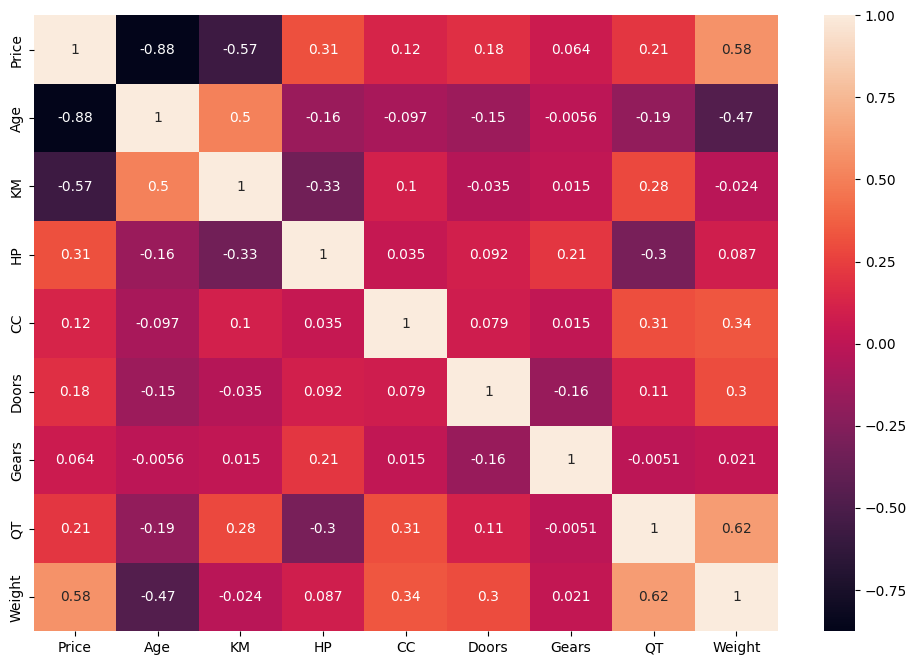

In [88]:
plt.figure(figsize = (12,8))
sns.heatmap(
    data.corr(),
    annot = True)

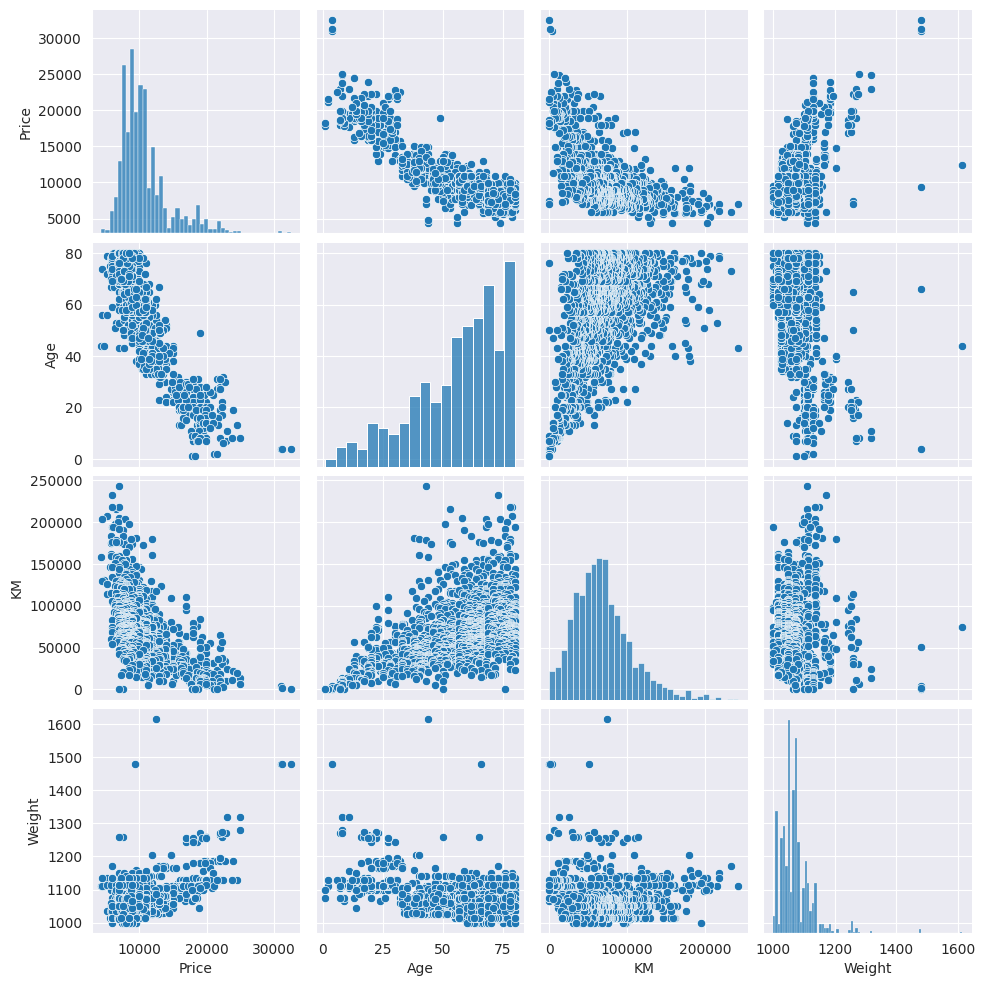

In [89]:
sns.set_style(style = 'darkgrid')
sns.pairplot(data[continuous_feature])

**Observation:**  Age and KM has the highest score of correlation with Price but a negative correlation.

 * **Note:**  QT and Weight also have a collinearity among themselves which will affect our model.

 * **Notice:** KM and Age also have a collinearity among themselves which will affect our model.

#  **PCA**

**Principal Component Analysis (PCA)** was the first dimensionality reduction technnique discovered (by Karl Pearson - yes, the guy from Pearson's correlation coefficient) and dates back to as early as 1901.  It is very popular because it is **fast, easy to implement and easy to interpret.**

**PCA works by finding a low dimensional subspace that maximises the variances of the data in that subspace and performing a linear projection.  This basically means the data will be as spread out as possible, without changing the relationship between the data points.  This allows us to find patterns or indentify clusters if any exist.**

#  Principal Component Analysis

Let's discuss PCA. Since this isn't exactly a full machine learning algorithm, but instead an unsupervised learning algorithm.

PCA Review





![Filter Method](https://github.com/krishnaik06/Dimesnsionality-Reduction/raw/67a479eaaac811803a7a00bf182062e888d3fd8b//PCA.png)

# PCA on Standard Scaled Dataset

Explained variance

Explained variance shows how much of the variance/spread of the data is captured in each dimension, i.e. how important each additional principal component is to the original data representation.

# Let's seperate the x and y values

In [90]:
data1_standard_scaled.head()

Price       Age        KM        HP        CC     Doors  Gears  \
0  2.315960 -2.809735 -2.161995 -1.263960 -1.379373  1.127623    0.0   
1 -2.950442  0.955033  4.153225 -2.405601  2.885944  1.127623    0.0   
2 -1.500273  0.327572  3.338510 -2.405601  2.885944  1.127623    0.0   
3 -2.187195 -1.554812  2.939006 -2.405601  2.885944 -0.973154    0.0   
4 -2.187195  0.955033  2.851751 -1.263960 -1.379373  1.127623    0.0   

         QT    Weight  
0 -0.460346 -0.756550  
1  4.802275  3.216069  
2  4.802275  3.811962  
3  4.802275  2.421545  
4 -0.460346 -0.756550

In [91]:
array = data1_standard_scaled.values
x = array[:,1:]
y = array[:,1]


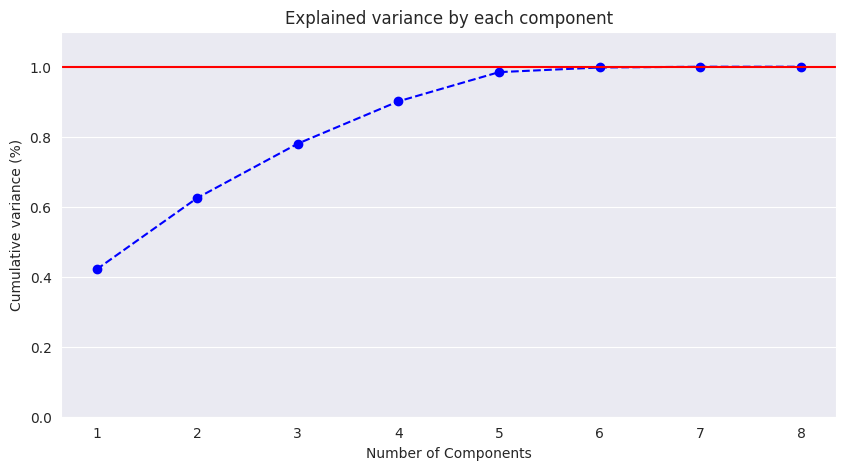

In [92]:
# PCA
pca_var = PCA()
pca_var.fit(x)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+x.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker = 'o', linestyle = '--', color = 'b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel("Number of Components")
plt.xticks(np.arange(1, 1+x.shape[1], step =1))
plt.ylabel("Cumulative variance (%)")
plt.title("Explained variance by each component")
plt.axhline(y=1, color = 'r', linestyle = '-')
plt.gca().xaxis.grid(False)

In [93]:
# The amount of variance that each PCA explains is

var = pca_var.explained_variance_ratio_
var

array([4.20738777e-01, 2.04185539e-01, 1.55339673e-01, 1.20866920e-01,
       8.34323455e-02, 1.32246339e-02, 2.21211188e-03, 7.78994402e-36])

Text(0.5, 1.0, 'Explained variance by each component')

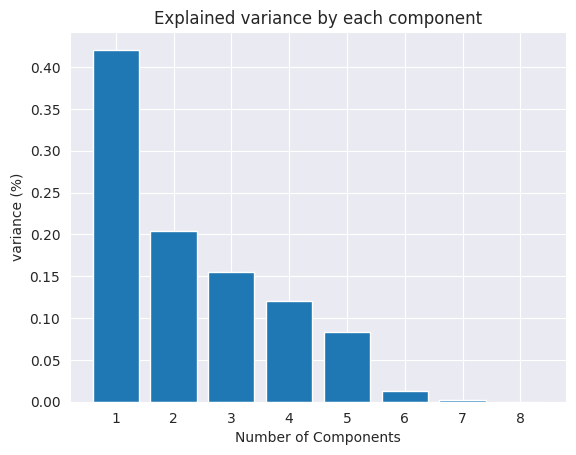

In [94]:
plt.bar(range(1, len(var)+1), var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [95]:
# Cumulative Variance
var1 = np.cumsum(np.round(var, decimals=4)*100)
var1

array([42.07, 62.49, 78.02, 90.11, 98.45, 99.77, 99.99, 99.99])

# As you can see just by 5 feature we get a variance of more than 90%

In [96]:
# PCA
pca = PCA()
pca_std = pca.fit_transform(x)

# Convert to data frame
pca_std_data1 = pd.DataFrame(data = pca_std, columns = ['PC1','PC2', 'PC3','PC4','PC5','PC6','PC7','PC8' ])

# Shape and preview
print(pca_std_data1.shape)
pca_std_data1.head()

(136, 8)


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.011860  1.201706 -0.312647  3.490275 -0.483815  0.289020 -0.189373   
1  7.170915  3.474225  0.896405 -1.603272 -0.125019  0.227857 -0.140010   
2  7.188168  3.332297  0.525957 -0.752728 -0.724358 -0.173078 -0.247250   
3  5.626627  4.171799 -2.008677 -0.849597 -1.056573  0.307424  0.115141   
4 -0.113438  1.743443  2.009534 -1.075994  2.517739 -0.093154 -0.067216   

            PC8  
0 -1.700399e-18  
1 -1.868111e-17  
2 -2.744316e-18  
3  1.765086e-17  
4  3.523499e-18

In [97]:
dataframe.Price

0      9450
1      6000
2      6950
3      6500
4      6500
       ... 
131    8500
132    7750
133    8450
134    8950
135    8500
Name: Price, Length: 136, dtype: int64

In [98]:
pca_std_data1["Price"]=y
pca_std_data1.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.011860  1.201706 -0.312647  3.490275 -0.483815  0.289020 -0.189373   
1  7.170915  3.474225  0.896405 -1.603272 -0.125019  0.227857 -0.140010   
2  7.188168  3.332297  0.525957 -0.752728 -0.724358 -0.173078 -0.247250   
3  5.626627  4.171799 -2.008677 -0.849597 -1.056573  0.307424  0.115141   
4 -0.113438  1.743443  2.009534 -1.075994  2.517739 -0.093154 -0.067216   

            PC8     Price  
0 -1.700399e-18 -2.809735  
1 -1.868111e-17  0.955033  
2 -2.744316e-18  0.327572  
3  1.765086e-17 -1.554812  
4  3.523499e-18  0.955033

In [99]:
import statsmodels.formula.api as sm
pca_model = sm.ols('Price~PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8', data = pca_std_data1).fit()
pca_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.197e+31
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:13:17   Log-Likelihood:                 4542.3
No. Observations:                 136   AIC:                            -9069.
Df Residuals:                     128   BIC:                            -9045.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    7.91e-16   6.68e-17     11.834      0.000    6.59e-16    9.23e-16
PC1            0.0489    3.9e-17   1.26e+15      0.000       0.049       0.049
PC2           -0.3042   5.59e-17  -5.44e+15      0.000      -0.304      -0.304
PC3            0.6666   6.41e-17   1.04e+16      0.000       0.667       0.667
PC4           -0.6437   7.27e-17  -8.86e+15      0.000      -0.644      -0.644
PC5           -0.2146   8.75e-17  -2.45e+15      0.000      -0.215      -0.215
PC6            0.0156    2.2e-16   7.11e+13      0.000       0.016       0.016
PC7           -0.0061   5.37e-16  -1.13e+13      0.000      -0.006      -0.006
PC8         2.544e-17   2.12e-32    1.2e+15      0.000    2.54e-17    2.54e-17
==============================================================================
Omnibus:                        3.488   Durbin-Watson:                   1.415
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                2.946
Skew:                          -0.303   Prob(JB):                        0.229
Kurtosis:                       3.391   Cond. No.                     2.33e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.36e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [100]:
transformer_y = StandardScaler().fit(dataframe['Price'].to_numpy().reshape(-1,1))
# Scale the test dataset
y_train_scal = transformer_y.transform(dataframe['Price'].to_numpy().reshape(-1,1))

# Predict with the trained model
predict = pd.DataFrame(pca_model.predict(pca_std_data1))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the test set results
rmse_linear = (np.sqrt(mean_squared_error(dataframe.Price, predict_unscaled)))
print('R2_score:' , pca_model.rsquared)
print('R2_Adjusted_score:' , pca_model.rsquared_adj)
print("RMSE:", rmse_linear)

R2_score: 1.0
R2_Adjusted_score: 1.0
RMSE: 1080.7626727893412


In [101]:
pca_std_data1['Price'] = dataframe['Price']
pca_std_data1.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.011860  1.201706 -0.312647  3.490275 -0.483815  0.289020 -0.189373   
1  7.170915  3.474225  0.896405 -1.603272 -0.125019  0.227857 -0.140010   
2  7.188168  3.332297  0.525957 -0.752728 -0.724358 -0.173078 -0.247250   
3  5.626627  4.171799 -2.008677 -0.849597 -1.056573  0.307424  0.115141   
4 -0.113438  1.743443  2.009534 -1.075994  2.517739 -0.093154 -0.067216   

            PC8  Price  
0 -1.700399e-18   9450  
1 -1.868111e-17   6000  
2 -2.744316e-18   6950  
3  1.765086e-17   6500  
4  3.523499e-18   6500

In [102]:
x_train,x_test, y_train, y_test = train_test_split(pca_std_data1.iloc[:,:-1],pca_std_data1.iloc[:,-1], test_size = 0.3, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((95, 8), (41, 8), (95,), (41,))

In [103]:
from sklearn.preprocessing import StandardScaler

# Scaling
transformer_y = StandardScaler().fit(y_train.to_numpy().reshape(-1,1))
y_train_scal = transformer_y.transform(y_train.to_numpy().reshape(-1,1))
y_test_scal = transformer_y.transform(y_test.to_numpy().reshape(-1,1))

# Linear Regression
regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train_scal)

LinearRegression()

In [104]:
from sklearn.metrics import r2_score

In [105]:
# Predict with the trained model
prediction = regressor_linear.predict(x_test)

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(prediction)

# Predicting Cross Validation Score the test set results
cv_linear = cross_val_score(estimator = regressor_linear, X =x_train, y=y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, predict_unscaled)))

print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_all_feature_train)
print('R2_score (test): ', r2_score_all_feature_test)
print("RMSE using all features: ", rmse_linear_using_all_features)

CV:  0.8455666789953333
R2_score (train):  0.9174021481939103
R2_score (test):  0.861389481491512
RMSE using all features:  223.49220618982898


# Forward Selection

Forward selection is an iterative method in which we start with having no feature in the model.  In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

The procedure starts with an empty set of features(reduced set).  The best of the original features is determined and added to the reduced set.  At each subsequent iteration, the best of the remaining original attributes is added to the set.

Step forward feature selection starts by evaluating all features individually and selects the one that generates the best performing algorithm, according to a pre-set evaluation criteria.  In the second step, it evaluates all possible combinations of the selected feature and a second feature, and selects the pair that produce the best performing algorithm based on the same pre-set criteria.

The pre-set criteria can be the roc_auc for classification and the r squared for regression for example.

This selection procedure is called greedy, because it evaluates all possible single, double, triple and so on feature combinations.  Therefore, it is quite computationally expensive, and sometimes, it feature space is big, even unfeasible.

There is a special package for python that implements this type of feature selection: mlxtend

In the mlxtend implementation of the step forward feature selection, the stopping criteria is an arbitrarily set number of features.  So the search will finish when we reach the desired number of selected features.

I will demonstrate the Step Forward feature selection algorith from mlxtend using the House Price dataset

In [106]:
X = dataframe.drop("Price", axis = 1)
Y = dataframe[['Price']]

In [107]:
# Find and remove correlated features

def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
     for j in range(i):
       if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

corr_features = correlation(X, 0.8)
print('Correlated features:', len(set(corr_features)))

Correlated features: 0


In [108]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matix = dataset.corr()
  for i in range(len(corr_matix.columns)):
     for j in range(i):
       if (corr_matix.iloc[i, j]) > threshold:
          colname = corr_matix.columns[i]
          col_corr.add(colname)
  return col_corr
corr_features = correlation(X, -0.8)
print('Correlated features:', len(set(corr_features)))

Correlated features: 6


In [109]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((95, 8), (41, 8), (95, 1), (41, 1))

In [110]:
# step forward feature selection

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Step forward feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(),
          k_features = 4,
          forward = True,
          floating = False,
          verbose = 2,
          scoring = 'r2',
          cv = 3)

sfs1 = sfs1.fit(np.array(x_train), y_train)


[2024-02-05 13:14:37] Features: 1/4 -- score: 0.04364134475516346
[2024-02-05 13:14:40] Features: 2/4 -- score: 0.3355897068084146
[2024-02-05 13:14:43] Features: 3/4 -- score: 0.44507180964375087
[2024-02-05 13:14:45] Features: 4/4 -- score: 0.4826106152404776

In [111]:
sfs1.k_feature_idx_

(0, 1, 4, 7)

In [112]:
x_train.columns[list(sfs1.k_feature_idx_)]

Index(['Age', 'KM', 'Doors', 'Weight'], dtype='object')

**Observation:**  For the above case we can say these 4 features are enough to get a higher R-squared value.

#  Regularization

You have your model ready, you have predicted your output.  So why do you need to study regularization?  Is it necessary?

Suppose you have taken part in a competition, and in that problem you need to predict a continuous variable.  So you applied linear regression and predicted your output.  Voila!  You are on the leaderboard.  But wait what you see is still there are many people above you on the leaderboard.  But you did everything right then how is it possible?

"Everything should be made simple as possible, but not simple-Alber Einstein"

What we did was simpler, everybody else did that, now let us look at making it simple.  That is why, we will try to optimize our code with the help of regularization.

In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients.  How does reducing the coefficients will help us?

Let us take a look at the coefficients of feature in our above regression model.

In [113]:
# Checking the magnitude of coefficients

import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [114]:
f = 'Price~Age+KM+HP+CC+Doors+Weight+QT+Gears'
reg_results = sm.ols(f, data=dataframe).fit()

err_series = reg_results.params - reg_results.conf_int()[0]
err_series

coef_data1 = pd.DataFrame({'coef': reg_results.params.values[1:],
                           'err': err_series.values[1:],
                           'varname': err_series.index.values[1:]
                           })

In [115]:
print(coef_data1)

          coef         err varname
0   -90.814450   11.307052     Age
1    -0.011714    0.001327      KM
2   -19.893213   11.778295      HP
3    -0.363661    1.015218      CC
4   -52.048534   55.301884   Doors
5    38.302547    3.983928  Weight
6   -34.382600    8.475128      QT
7 -3681.361998  677.443844   Gears


<Axes: title={'center': 'Model Coefficients'}, xlabel='varname'>

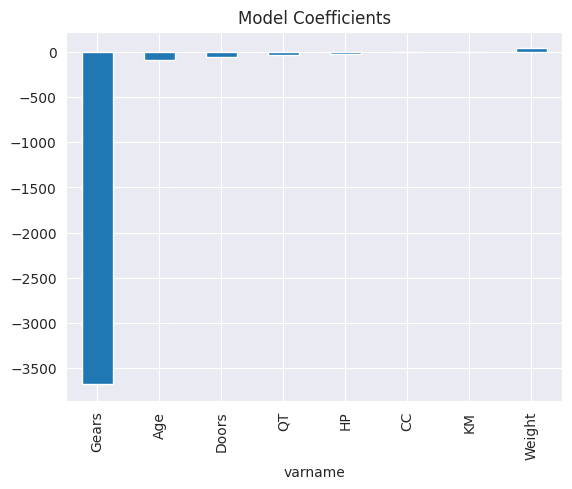

In [116]:
# Checking the magnitude of coefficients

coef = pd.Series(data = coef_data1.coef.values, index = coef_data1.varname).sort_values()

coef.plot(kind = 'bar', title = 'Model Coefficients')

We can see that coefficients kof Gears(last1) is much higher as compared to rest of the coefficients.  Therefore the total Price would be more driven by this feature.

How can we reduce the magnitude of coefficients in our model?  For this purpose, we have different types of regression techniques which uses regularization to overcome this problem.

So let us discuss them.

# Ridge Regression

Let us first implement it on out above problem and check our results that whether it performs better than our linear regression model.

In [117]:
from sklearn.linear_model import Ridge

## Training the model

ridgeReg = Ridge(alpha = 0.05)

ridgeReg.fit(x_train, y_train)

Ridge(alpha=0.05)

* **Note:**  That the value of alpha, which is hyperparameter of Ridge, which means that they are not automatically learned by the model instead they have to be set manually.

Here we have consider alpha = 0.05.
But let us consider different values of alpha and plot the coefficients for each case.

In [118]:
# Importing the required modules
from sklearn.metrics import r2_score, mean_squared_error

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridgeReg, X = x_train, y = y_train, cv =10)

y_pred_ridge_test = ridgeReg.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)
# Predicting R2 Score the Train set results
y_pred_ridge_train = ridgeReg.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting RMSE the test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print("CV:", cv_ridge.mean())
print("R2_score(train):", r2_score_ridge_train)
print("R2_score(test):", r2_score_ridge_test)
print("RMSE:", rmse_ridge)

CV: 0.8455722036004583
R2_score(train): 0.9174021444282907
R2_score(test): 0.8613882210568795
RMSE: 223.4932223344889


In [119]:
ridgeReg.coef_.flatten()

array([-9.24021796e+01, -1.14036469e-02, -1.69303943e+01, -6.81761884e-01,
       -5.06050184e+01,  0.00000000e+00, -3.25828171e+01,  3.84405904e+01])

In [120]:
coef_data1 = pd.DataFrame({'coef': ridgeReg.coef_.flatten(),
                           'varname': dataframe.columns.values[1:]
                           })
print(coef_data1)

        coef varname
0 -92.402180     Age
1  -0.011404      KM
2 -16.930394      HP
3  -0.681762      CC
4 -50.605018   Doors
5   0.000000   Gears
6 -32.582817      QT
7  38.440590  Weight


<Axes: title={'center': 'alpha = 0.01'}, xlabel='varname'>

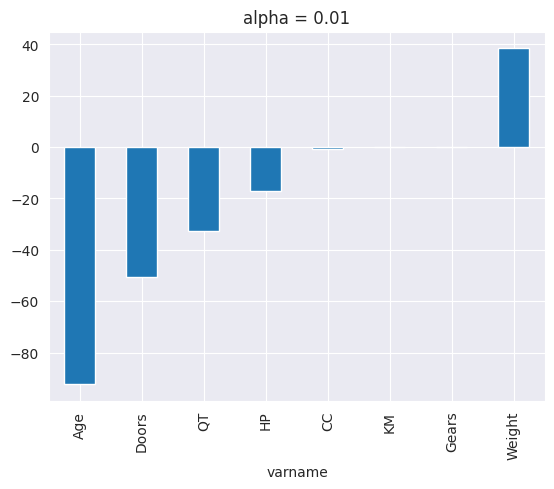

In [121]:
# Checking the magnitude of coefficients

coef = pd.Series(data = coef_data1.coef.values, index = coef_data1.varname).sort_values()

coef.plot(kind = 'bar', title = 'alpha = 0.01')

<Axes: title={'center': 'alpha=0.5'}, xlabel='varname'>

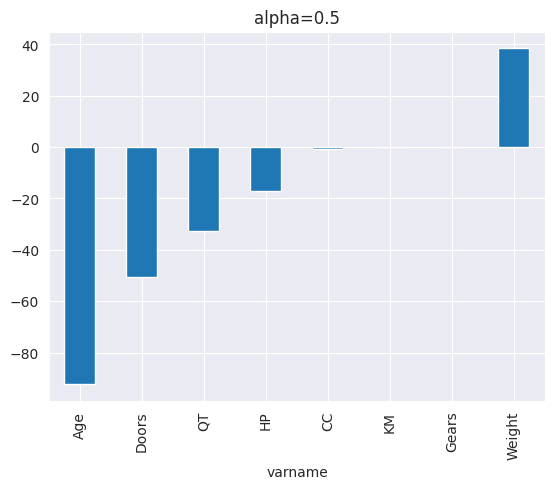

In [122]:
# Checking the magnitude of coefficients

coef = pd.Series(data = coef_data1.coef.values, index = coef_data1.varname).sort_values()

coef.plot(kind = 'bar', title = 'alpha=0.5')

<Axes: title={'center': 'alpha=5'}, xlabel='varname'>

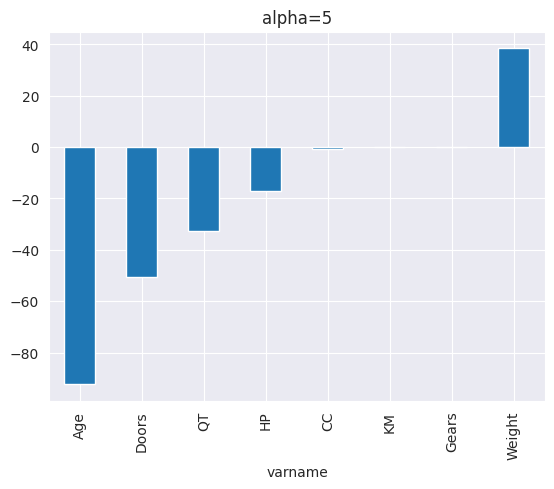

In [123]:
# Checking the magnitude of coefficients
coef = pd.Series(data = coef_data1.coef.values, index = coef_data1.varname).sort_values()
coef.plot(kind='bar', title ='alpha=5')

<Axes: title={'center': 'alpha=10'}, xlabel='varname'>

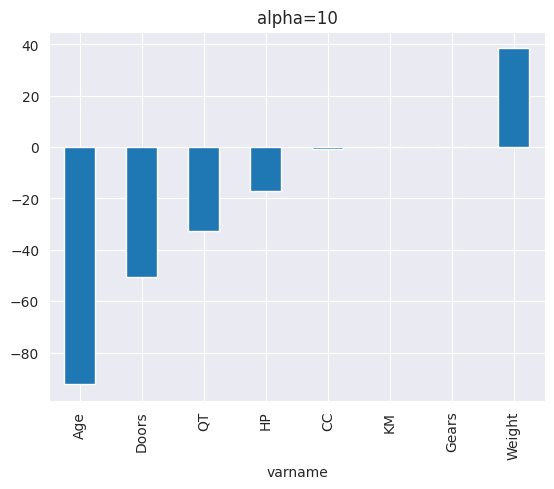

In [124]:
# Checking the magnitude of coefficients

coef = pd.Series(data = coef_data1.coef.values, index = coef_data1.varname).sort_values()
coef.plot(kind = 'bar', title ='alpha=10')

You can see that, as we increase the value of alpha, the magnitude of the coefficients decreases.

But, if you calculate R-square for each alpha, we will see that the value of R-square will be maximum at alpha = 0.05.  So we have to choose it wisely by iterating it through a range of values and usinf the one which gives us lowest error.

In [125]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha = 0.5, fit_intercept = True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Ridge(alpha=0.5))])

In [126]:
# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = ridge_pipe, X = x_train, y = y_train,cv = 10)

# Predicting R2 Score the Test set results
y_pred_ridge_train = ridge_pipe.predict(x_train)
r2_score_ridge_train = r2_score(y_train, y_pred_ridge_train)

# Predicting R2 Score the Test set results
y_pred_ridge_test = ridge_pipe.predict(x_test)
r2_score_ridge_test = r2_score(y_test, y_pred_ridge_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))
print("CV:", cv_ridge.mean())
print('R2_score (train):', r2_score_ridge_train)
print('R2_score (test):', r2_score_ridge_test)
print("RMSE:", rmse_ridge)

CV: 0.7800706094271861
R2_score (train): 0.9262449547598308
R2_score (test): 0.8626563490468506
RMSE: 222.46852866409907


In [127]:
!pip install sklearn
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge

# here, again I will train a Ridge Linear regression and select
# the non zero features in one line.
# bear in mind that the linear regression object from sklearn does
# not allow for regularisation. So If you want to make a regularised
# linear regression you need to import specifically "Ridge"
# that is the l1 version of the linear regression
# alpha is the penalisation here, so I set it high in order
# to force the algorithm to shrink some coefficients

sel_ridge = SelectFromModel(Ridge(alpha=0.05))
sel_ridge.fit(x_train, y_train)

sel_ridge.get_support()

# Make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_ridge.get_support())]

print('Total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

print(x_train.columns[(sel_ridge.get_support())])

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Total features: 8
selected features: 4
Index(['Age', 'Doors', 'QT', 'Weight'], dtype='object')


Important Points:

 * It shrinks th parameters, therefore it is mostly used to prevent multicollinearity.

 * It reduces the model complexity by coefficient shrinkage.

 * It uses L2 regularization technique. (Which I will discussed later)

Now, let us consider another type of regression technique which also makes use of regularization.

#  LASSO Regression

Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.

Regularisation consists in adding a penality to the different parameters of the machine learning model to reduce the freedom of the model and in other words to avoid overfitting.  Linear model regularisation, the penalty is applied over the coefficients that multiply each of the predictors.  From the different types of regularisation, Lasso or I1 has the property that is able to shrink some of the coefficients to zero.  Therefore, that feature can be removed from the model.

I will demonstrate how to select features using the Lasso regularisation on the Housing Price dataset from Kaggle.

In [128]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha = 0.5)
lassoReg.fit(x_train, y_train)
pred = lassoReg.predict(x_test)

In [129]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_ridge = cross_val_score(estimator = lassoReg, X =x_train, y = y_train, cv=10)

# Predicting R2 Score the Train set results
y_pred_lasso_train = lassoReg.predict(x_train)
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lassoReg.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_ridge = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))
print("CV:", cv_ridge.mean())
print("R2_sccore (train):", r2_score_lasso_train)
print("R2_score (test):", r2_score_lasso_test)
print("RMSE:", rmse_ridge)

CV: 0.8456067235314384
R2_sccore (train): 0.917400886005575
R2_score (test): 0.8613294600715059
RMSE: 223.54058948663868


Again lets change the value of alpha and see how does it affect the coefficients.

In [130]:
coef_data1 = pd.DataFrame({"coef": lassoReg.coef_.flatten(),
                          'varname': dataframe.columns.values[1:]
                          })
print(coef_data1)

        coef varname
0 -92.375442     Age
1  -0.011406      KM
2 -16.913600      HP
3  -0.678737      CC
4 -49.653696   Doors
5   0.000000   Gears
6 -32.555978      QT
7  38.388014  Weight


<Axes: title={'center': 'alpha = 0.05'}, xlabel='varname'>

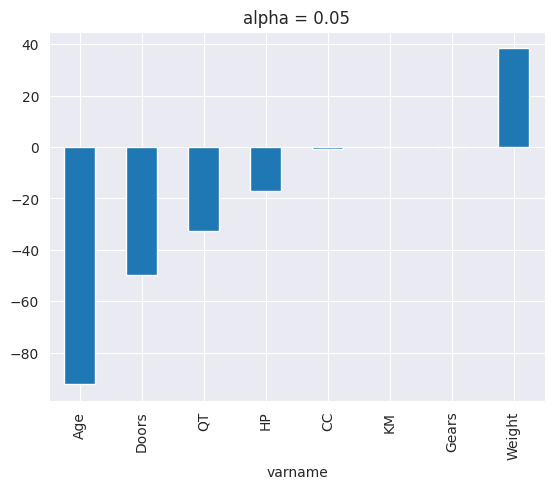

In [131]:
# Checking the magnitude of coefficients

coef = pd.Series(data = coef_data1.coef.values, index = coef_data1.varname).sort_values()
coef.plot(kind = 'bar', title = 'alpha = 0.05')

<Axes: title={'center': 'alpha = 0.5'}, xlabel='varname'>

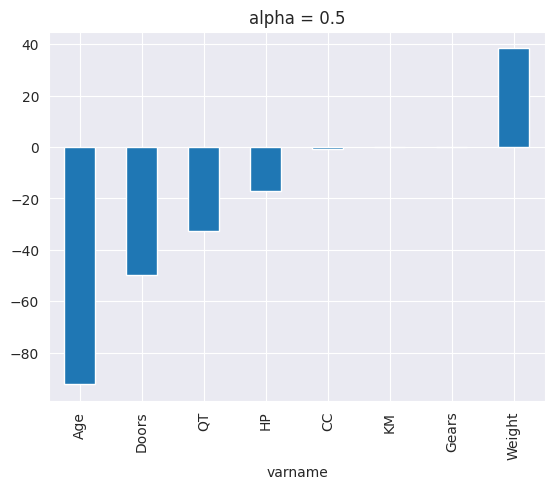

In [132]:
# Checking the magnitude of coefficients

coef = pd.Series(data = coef_data1.coef.values, index = coef_data1.varname).sort_values()
coef.plot(kind = 'bar', title = 'alpha = 0.5')

So, we can see that even ata small values of alpha, the magnitude of coefficients have reduced a lot.  By looking at the plots, can you figure a difference between ridge and lasso?

We can see that as we increased the value of alpha, coefficients were approaching towards zero, but if you see in case of lasso, even at smaller alpha's, our coefficients are reducing to absolute zeroes.  Therefore, lasso selects the only some feature while reduces the coefficient of others to zero.  This property is known as feature selection and which is absent in case of ridge.

In [133]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

steps = [
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2)),
    ("model", Lasso(alpha=0.5, fit_intercept=True, tol = 0.0199, max_iter = 2000))
]

lasso_pipe = Pipeline(steps)
lasso_pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', Lasso(alpha=0.5, max_iter=2000, tol=0.0199))])

In [134]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predicting Cross Validation Score
cv_lasso = cross_val_score(estimator = lasso_pipe, X = x_train, y = y_train, cv=10)

# Predicting R2 Score the Train set results
y_pred_lasso_train = lasso_pipe.predict(x_train)
r2_score_lasso_test = r2_score(y_train, y_pred_lasso_train)

# Predicting R2 Score the Test set results
y_pred_lasso_test = lasso_pipe.predict(x_test)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

# Predicting RMSE the Test set results
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
print('CV: ', cv_lasso.mean())
print('R2_score(train): ', r2_score_lasso_train)
print('R2_score (test): ', r2_score_lasso_test)
print('RMSE: ', rmse_lasso)

CV:  0.6958610361174684
R2_score(train):  0.917400886005575
R2_score (test):  0.8436951390009013
RMSE:  237.32884783870537


In [135]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [136]:
sel_lasso = SelectFromModel(Lasso(alpha =  100))
sel_lasso.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=100))

In [137]:
sel_lasso.get_support()

array([ True,  True,  True,  True, False, False,  True,  True])

In [138]:
# make a list with the selected features and print the outputs
selected_feat = x_train.columns[(sel_lasso.get_support())]

print('Total features : {}'.format((x_train.shape[1])))
print("Selected features: {}".format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(sel_lasso.estimator_.coef_==0)))

Total features : 8
Selected features: 6
features with coefficients shrank to zero: 2


In [139]:
x_train.columns[(sel_lasso.get_support())]

Index(['Age', 'KM', 'HP', 'CC', 'QT', 'Weight'], dtype='object')

Let's compare the residuals of all the models to come up with an conclusion.

# Model Validation

Comparing different models with respect to their Root Mean Squared Errors.

We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) - AKA the average distance (squared to get rid of negative numbers) between the model's predicted target values and the actual target values.

In [140]:
x = dataframe[['Age', 'KM','HP', 'CC', 'Doors', 'QT', 'Weight']]
y = dataframe[['Price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)

# Scale the Test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_data1 = pd.DataFrame(x_train_scal, columns = ['Age', 'KM', 'HP', 'CC', 'Doors', 'QT','Weight' ])
x_data1.head()

# Predict with the trained model
predict = pd.DataFrame(model_1.predict(x_data1))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y, predict_unscaled)))
print('R2_score : ', model_1.rsquared)
print('R2_Adjusted_score :', model_1.rsquared_adj)
print('RMSE:', rmse_linear)

R2_score :  0.9055635620970799
R2_Adjusted_score : 0.900399069399264
RMSE: 201.31443740889617


In [141]:
square_root_pred_y = np.square(sqrt_transformed_model.predict(data1_sqrt_scaled[['Age', 'Weight', 'KM', 'HP','CC', 'QT', 'Doors', 'Gears']]))
cube_root_pred_y = pow(cbrt_transformed_model.predict(data1_cbrt_scaled[['Age', 'Weight', 'KM', 'HP', 'CC','QT','Doors','Gears']]),3)
log_model_pred_y = np.exp(log_transformed_model.predict(data1_log_scaled[['Age', 'Weight', 'KM','HP', 'CC', 'Doors' ]]))

In [142]:
square_root_both_rmse = np.sqrt(mean_squared_error(dataframe['Price'], square_root_pred_y))
cube_root_both_rmse = np.sqrt(mean_squared_error(dataframe['Price'], cube_root_pred_y))
log_both_rmse = np.sqrt(mean_squared_error(dataframe['Price'], log_model_pred_y))

In [143]:
print('Raw Model = ',np.sqrt(raw_data_model.mse_resid),
      '\n' 'After Removing Influencers = ', np.sqrt(final_model.mse_resid),
      '\n' 'After Log Transformation on both Model = ', log_both_rmse,
      '\n' 'After Cube-root Transformation on both Model = ', cube_root_both_rmse,
      '\n' 'After Square Root Transfrmation on both Model = ', square_root_both_rmse,
      '\n' 'After Removing Influencers from model', np.sqrt(final_model.mse_resid),
      '\n' 'Final Model without Multicollinearity Model = ', rmse_linear)

Raw Model =  210.4695786797549 
After Removing Influencers =  207.5101723496679 
After Log Transformation on both Model =  267.88073077821855 
After Cube-root Transformation on both Model =  213.66571415690424 
After Square Root Transfrmation on both Model =  207.51658070229945 
After Removing Influencers from model 207.5101723496679 
Final Model without Multicollinearity Model =  201.31443740889617


# Let's compare the Root Mean Square Error and check for the minimum value

In [144]:
rmse_compare = {"Raw Model": np.sqrt(raw_data_model.mse_resid),
                'After Removing Influencers': np.sqrt(final_model.mse_resid),
                'After Log Transformation Model': log_both_rmse,
                'After Cube-root Tranformation Model': cube_root_both_rmse,
                'After Square Root Transformation Model': square_root_both_rmse,
                'After Removing Influencers from model': np.sqrt(final_model.mse_resid),
                'Final Model without Multicollinearity Model': rmse_linear
                }
min(rmse_compare, key=rmse_compare.get)

'Final Model without Multicollinearity Model'

**Observation:**  The Model that was build without Multicollinearity issue and using Standard Scaler Transformation performed very well.

* Scoring minimum Root mean squared error and a good R-squared and adjusted R-squared.

* **Note:** We are going to rebuild the model by using that model.

In [164]:
Final_model = smf.ols("Price~Age+KM+HP+CC+Doors+QT+Weight", data = data).fit()
# Finding rsquared values
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1269.
Date:                Mon, 05 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:37:54   Log-Likelihood:                -12371.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1427   BIC:                         2.480e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.3843   1061.677     -2.483      0.013   -4718.999    -553.770
Age         -121.8478      2.622    -46.476      0.000    -126.991    -116.705
KM            -0.0205      0.001    -16.325      0.000      -0.023      -0.018
HP            33.6479      2.742     12.270      0.000      28.269      39.027
CC            -0.1227      0.090     -1.358      0.175      -0.300       0.054
Doors        -23.9806     39.372     -0.609      0.543    -101.214      53.253
QT             4.0353      1.313      3.073      0.002       1.459       6.611
Weight        16.8844      1.072     15.743      0.000      14.781      18.988
==============================================================================
Omnibus:                      149.646   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              980.896
Skew:                          -0.217   Prob(JB):                    1.00e-213
Kurtosis:                       7.027   Cond. No.                     2.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Residual Analysis

* Test for Normality of Residuals (Q-Q Plot)

In [168]:
import statsmodels.api as sm

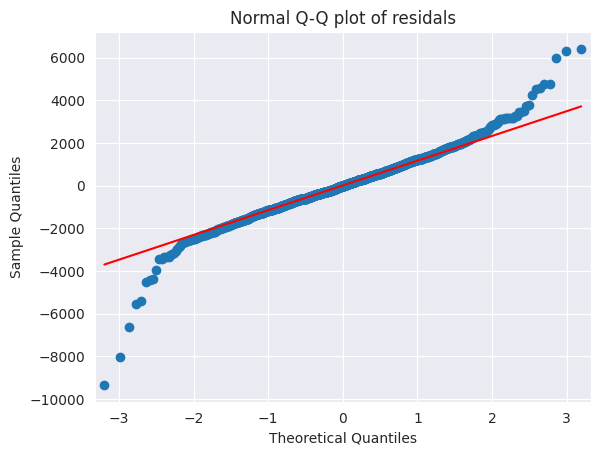

In [169]:
# Residuals values = y - yhat
sm.qqplot(Final_model.resid, line = 'q')
plt.title("Normal Q-Q plot of residals")
plt.show()

**Observation: ** Error should have Normal / Gaussian distribution ~ N(0,1) and independently and identically distributed.

# Residual Plot for Homoscedasticity




In [172]:
def get_standardized_values(vals):
  return(vals - vals.mean()) / vals.std()

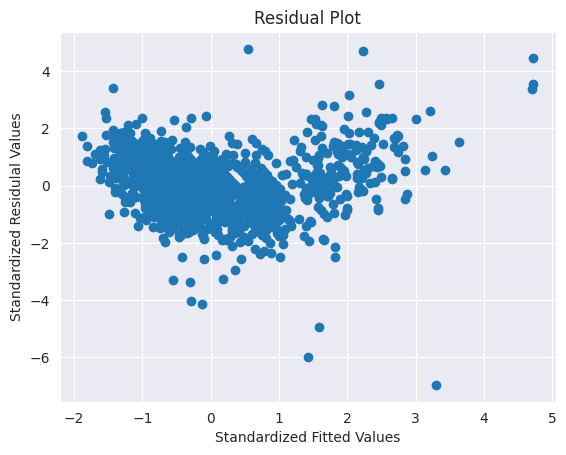

In [174]:
plt.scatter(get_standardized_values(Final_model.fittedvalues), get_standardized_values(Final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residulal Values')
plt.show()

**Observation:**  Constant Variance(Homoscedasticity) in Error

# Residual VS Regresssors

* Plotting to visualize the partial relation of each independent feature with the Dependence variable and errors.

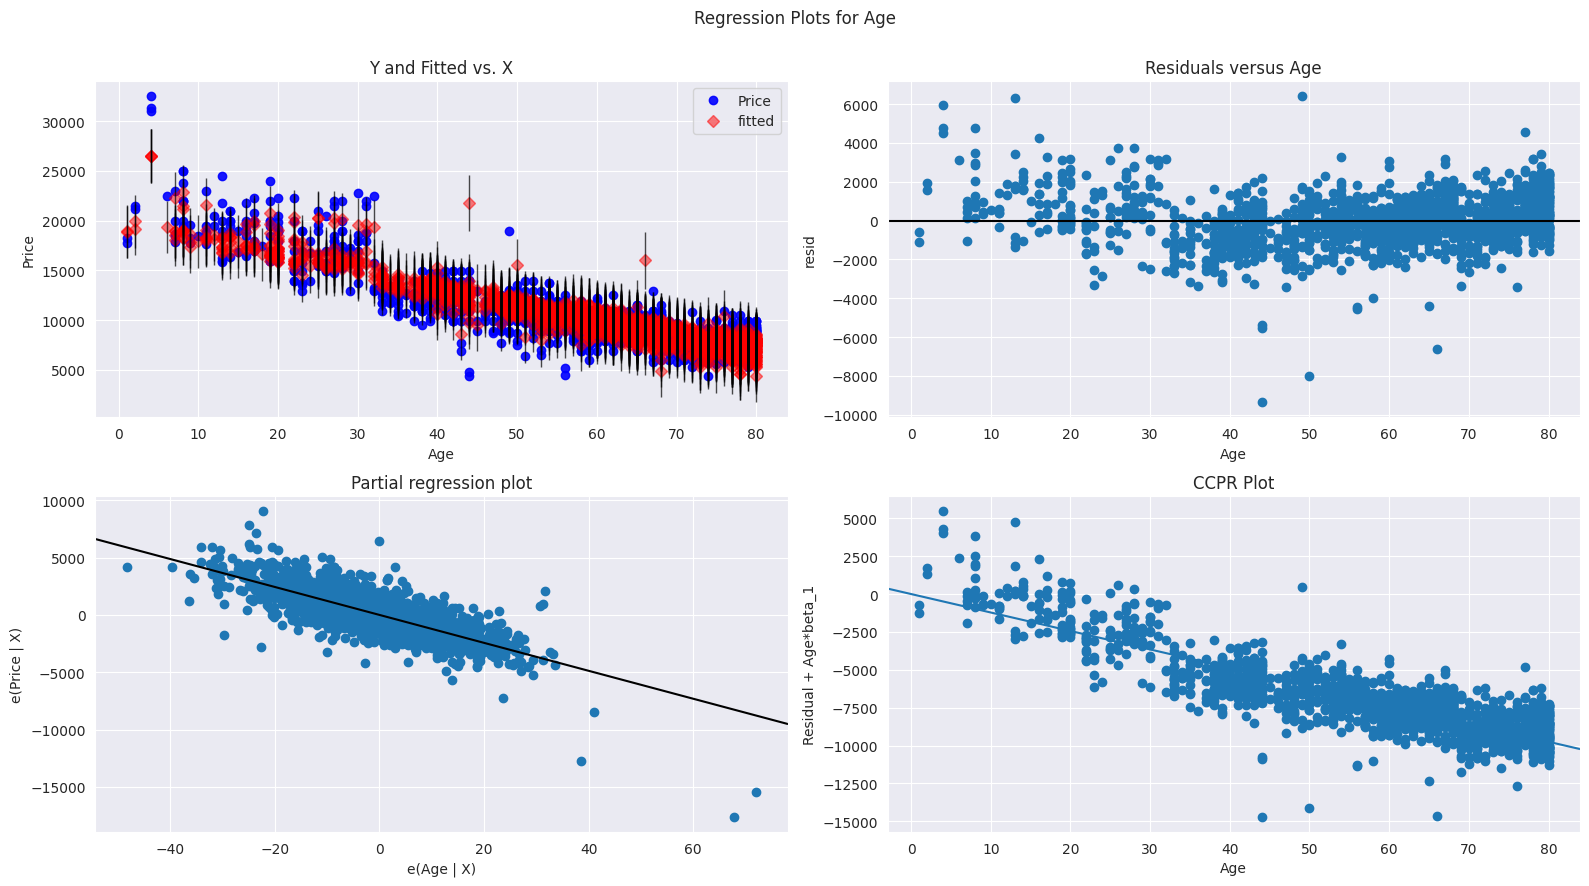

In [175]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Age', fig=fig)
plt.show()

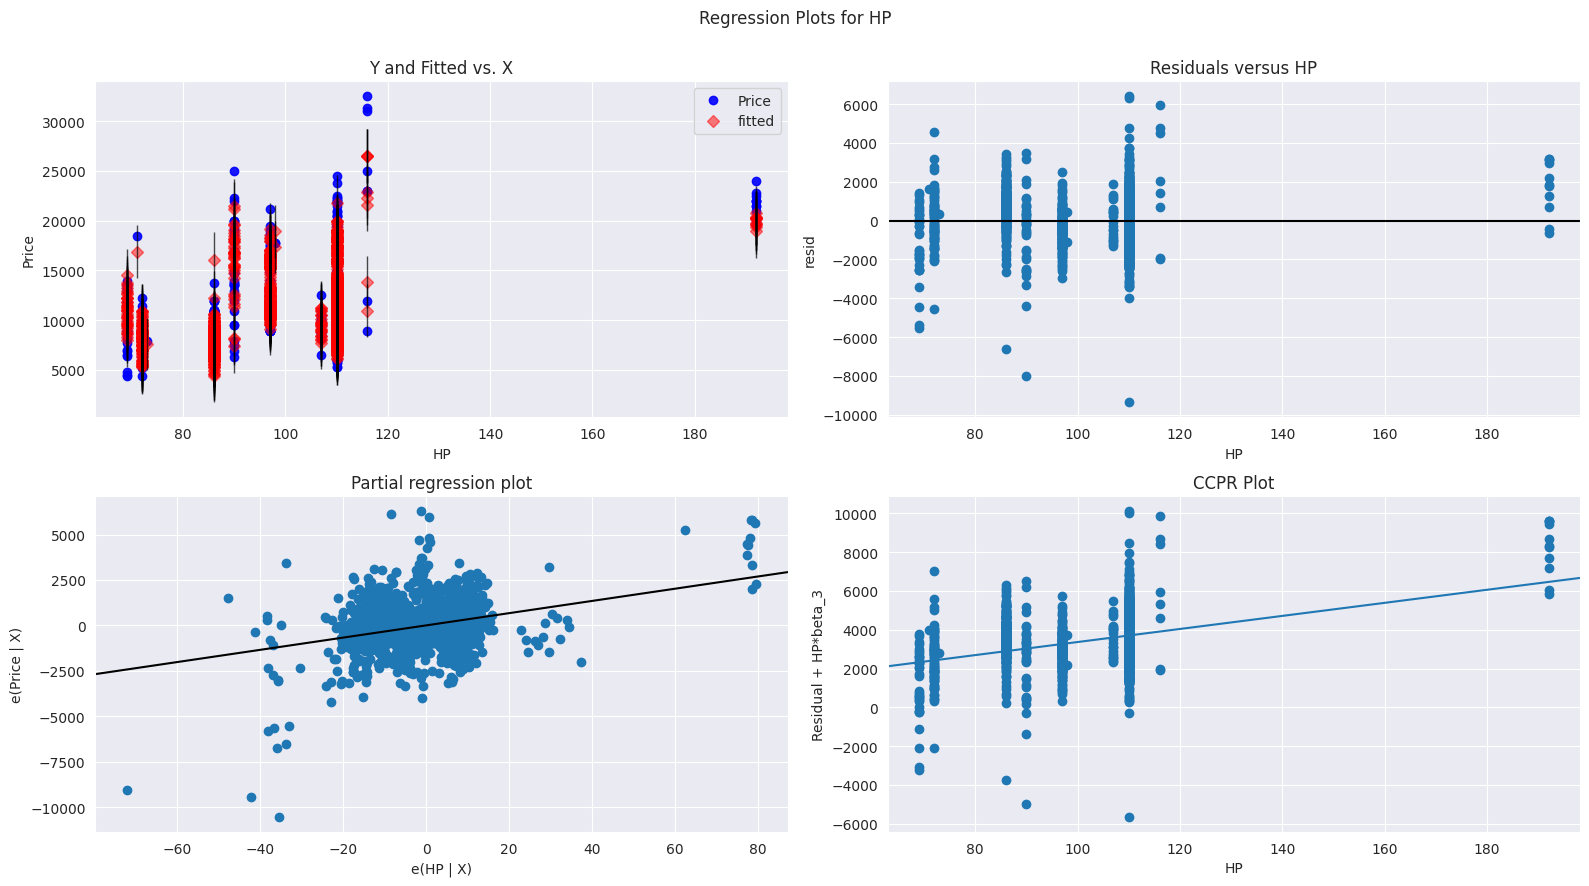

In [176]:
fig = plt.figure(figsize = (16, 9))
sm.graphics.plot_regress_exog(Final_model, 'HP', fig = fig)
plt.show()

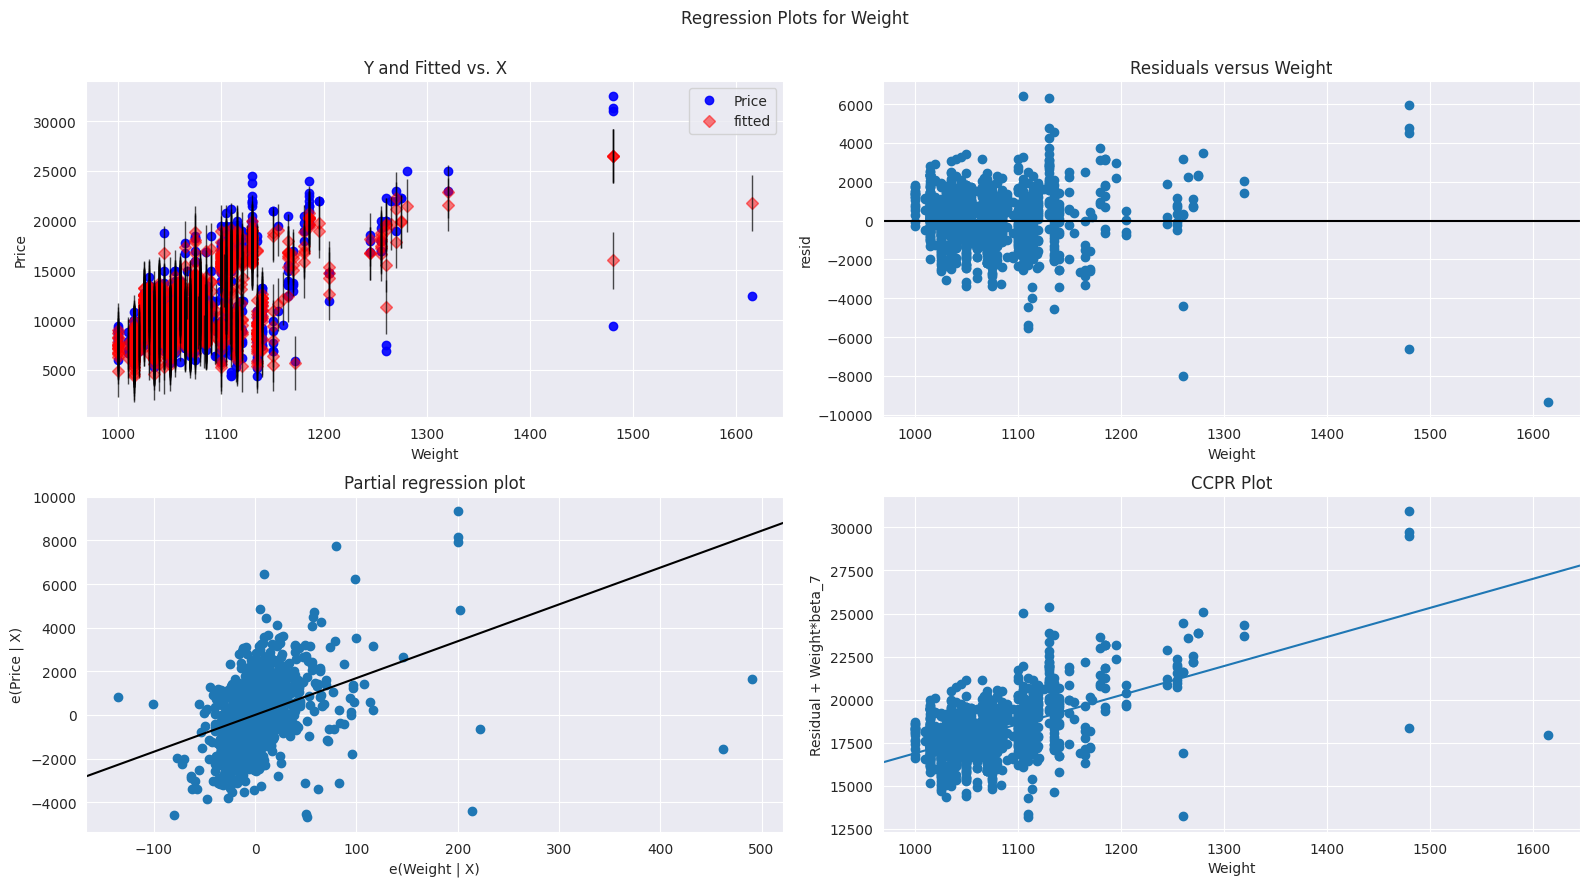

In [177]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Weight', fig=fig)
plt.show()

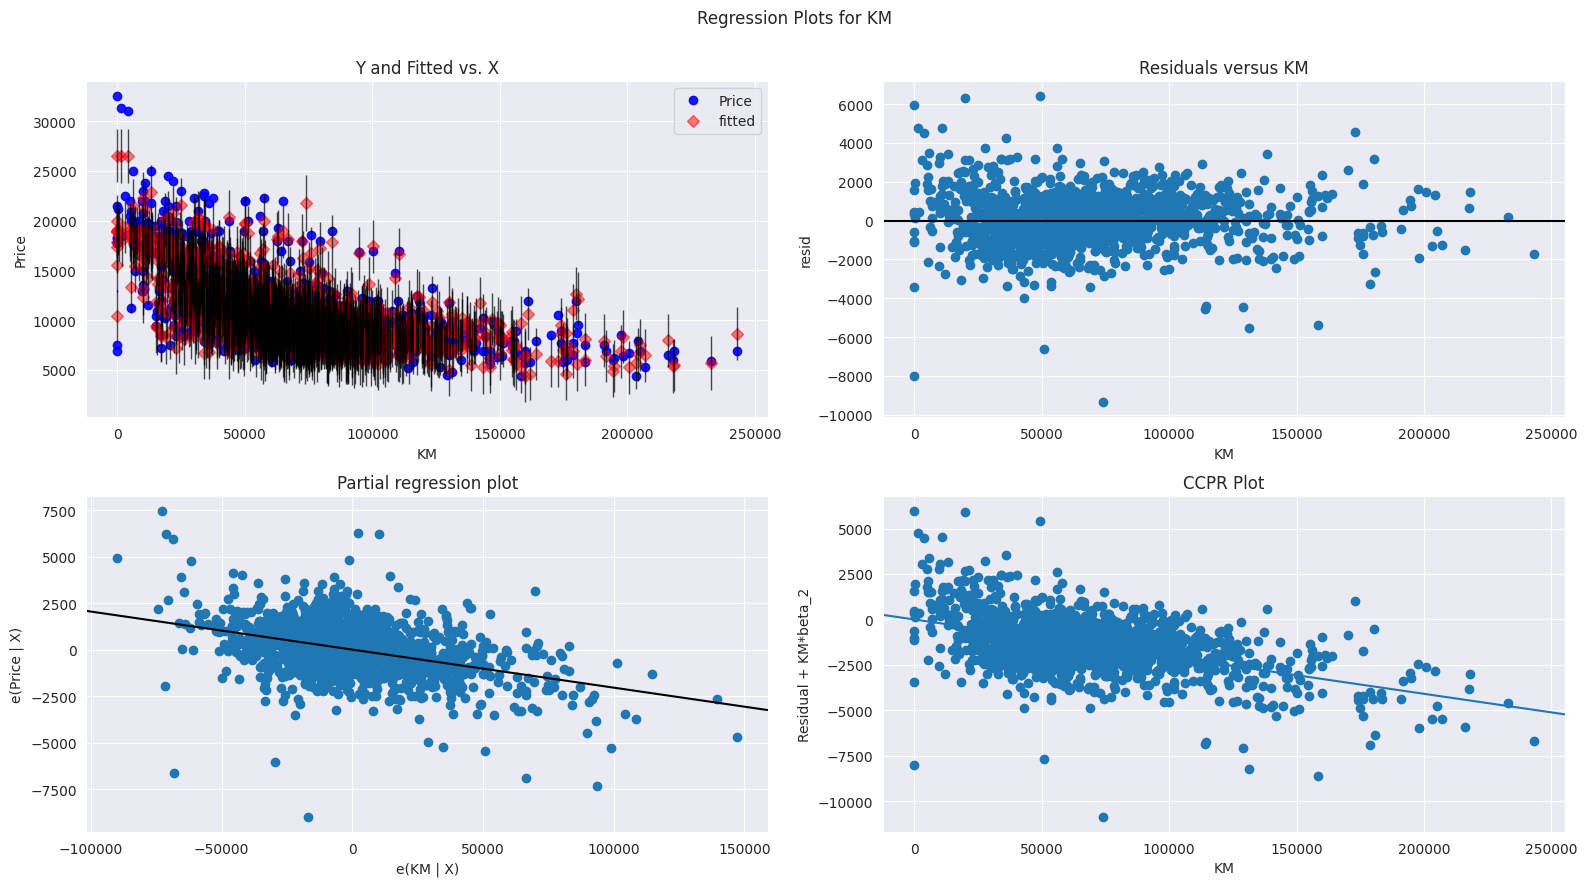

In [178]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'KM', fig=fig)
plt.show()

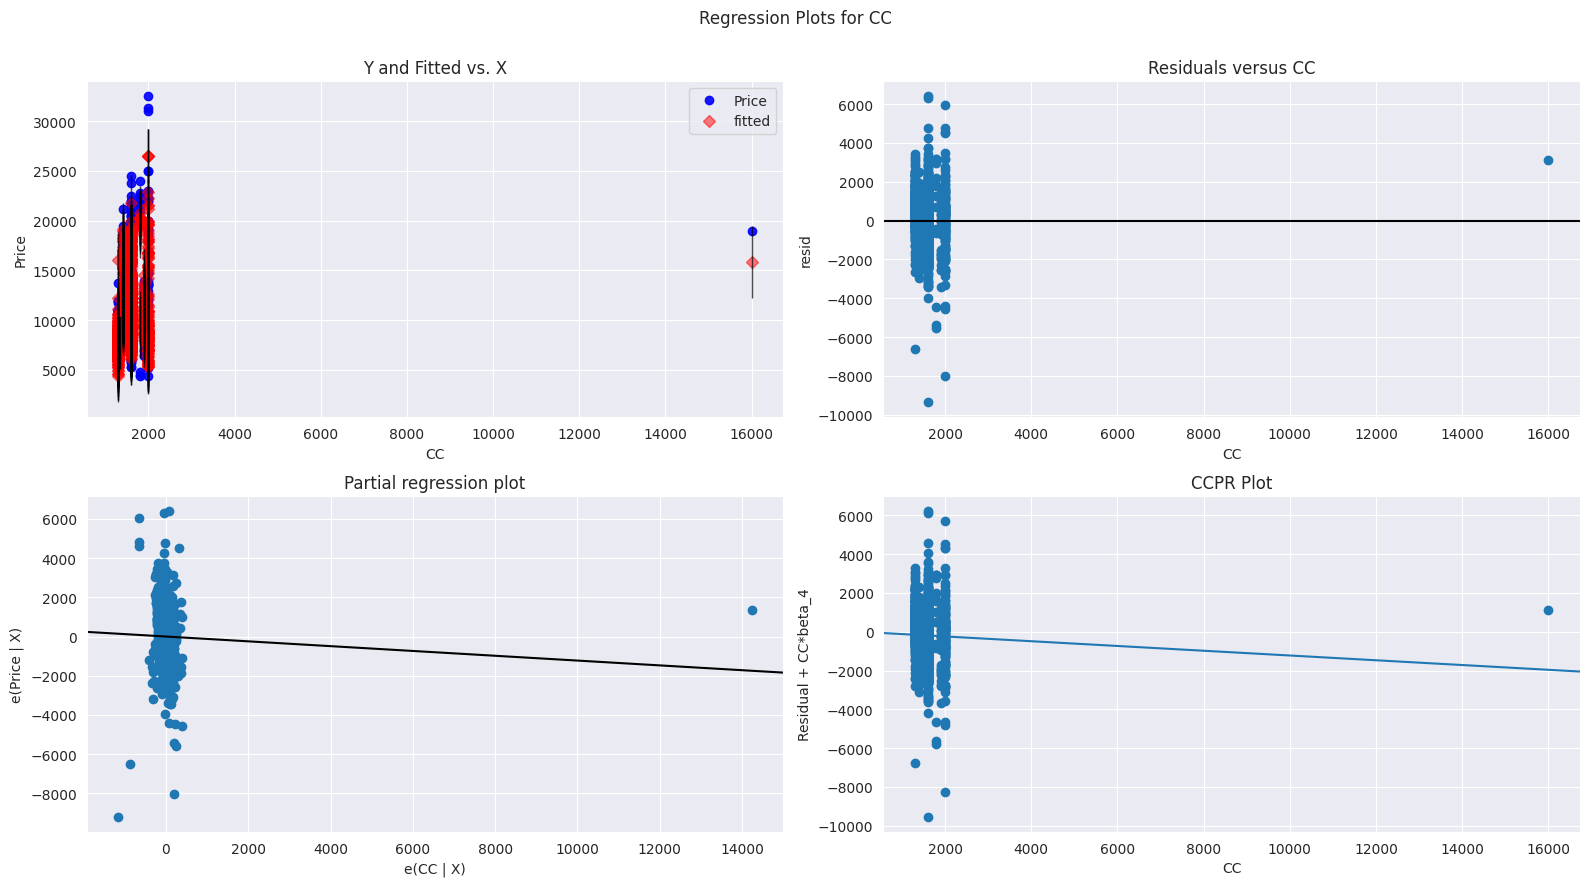

In [179]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'CC', fig = fig)
plt.show()

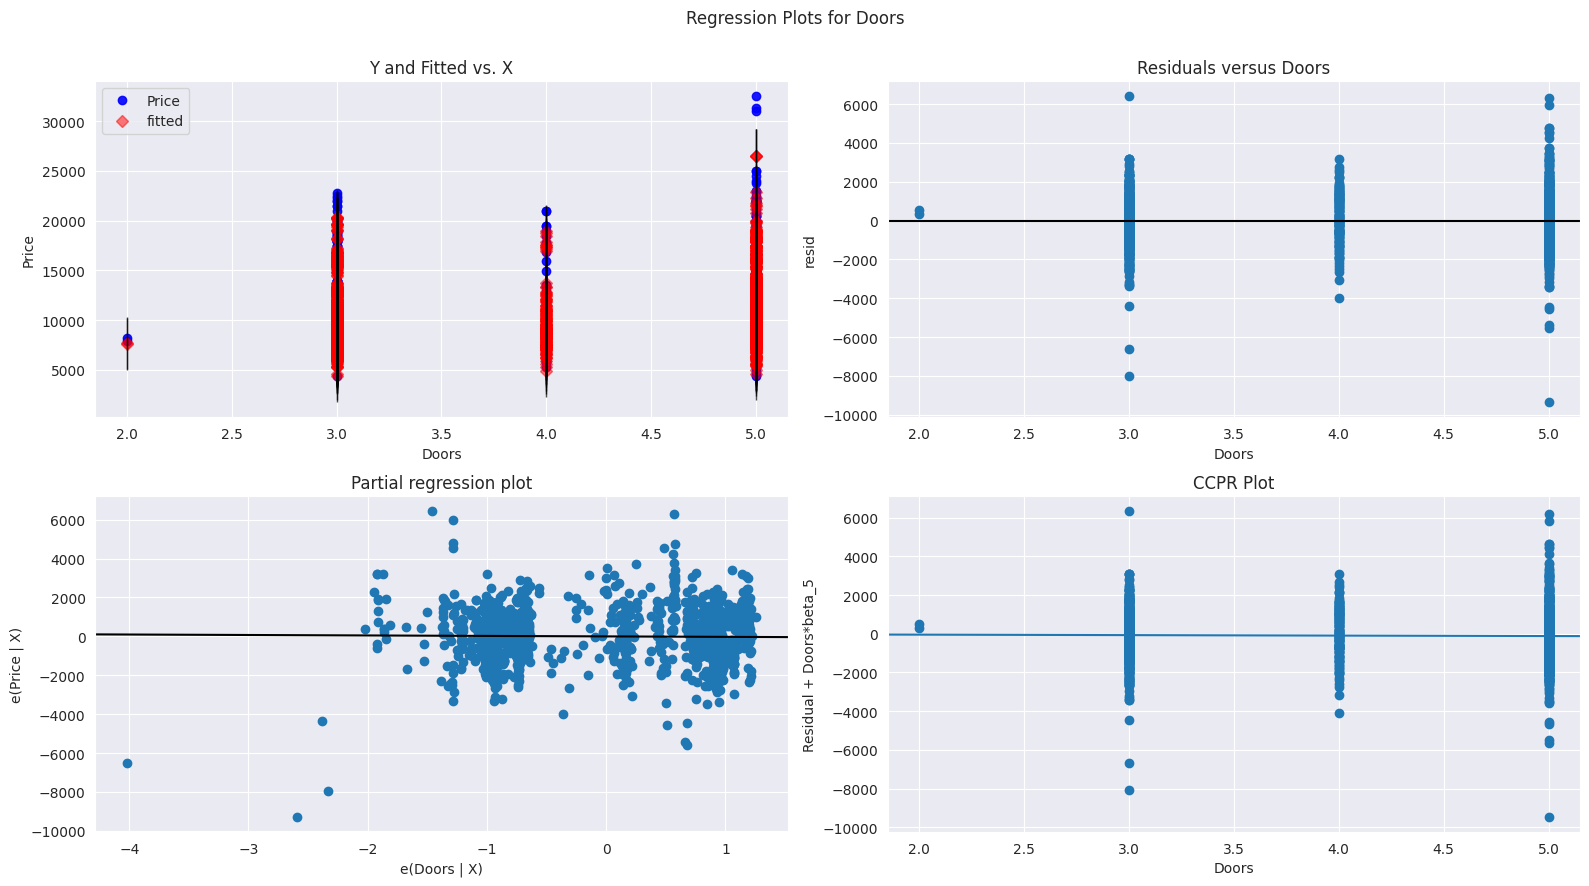

In [180]:
fig = plt.figure(figsize = (16,9))
sm.graphics.plot_regress_exog(Final_model, 'Doors', fig = fig)
plt.show()

**Observation:**  

* Some of the feature doesn't suggest linear relationship with the Dependent feature like Gears, QT, CC, Doors, Weight and HP
* Only KM and Age is having a linear relation with the Price Feature

# Predicting values from Model using same dataset

In [183]:
x = dataframe[['Age', 'KM','HP', 'CC', 'Doors', 'QT', 'Weight']]
y = dataframe[['Price']]
transformer_x  = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)

# Scale the test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_data1 = pd.DataFrame(x_train_scal, columns = ['Age', 'KM', 'HP', 'CC','Doors', 'QT', 'Weight'])
x_data1.head()

# Predict with the trained model
predict = pd.DataFrame(Final_model.predict(x_data1))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))
predict_unscaled

array([[-1549894.64533379],
       [-1818145.63999258],
       [-1761458.34567153],
       [-1593574.11948515],
       [-1850473.32700424],
       [-1701038.64072578],
       [-1568517.92536881],
       [-1664952.08221937],
       [-1742825.85039127],
       [-1667697.44007031],
       [-1765120.25264519],
       [-1717936.36762677],
       [-1737878.7607921 ],
       [-1667694.94805668],
       [-1898339.3285085 ],
       [-1742822.08522925],
       [-1765117.15641846],
       [-1667693.33584746],
       [-1608269.63371237],
       [-1787962.09376598],
       [-1689985.42396941],
       [-1675976.60240321],
       [-1841037.16628275],
       [-1708435.7660151 ],
       [-1790154.65291644],
       [-1592560.16614792],
       [-1642645.24578617],
       [-1617602.20322167],
       [-1801186.86794397],
       [-1667686.63563788],
       [-1728255.55442632],
       [-1725229.77044959],
       [-1708432.2664229 ],
       [-1735967.23008283],
       [-1692727.60792699],
       [-1642642.265

In [185]:
(np.sqrt(mean_squared_error(y, predict_unscaled)))

1729085.6667310977

In [187]:
predicted = pd.DataFrame(predict_unscaled, columns=['Predicted_Price'])
predicted['Price'] = dataframe.Price
predicted['Age'] = dataframe.Age
predicted['KM'] = dataframe.KM
predicted['Weight'] = dataframe.Weight
predicted['HP'] = dataframe.HP
predicted['CC'] = dataframe.CC
predicted['QT'] = dataframe.QT
predicted['Doors'] = dataframe.Doors
predicted

Predicted_Price  Price  Age      KM  Weight  HP    CC   QT  Doors
0      -1.549895e+06   9450   66   15110    1035  86  1300   69      5
1      -1.818146e+06   6000   78  217764    1135  72  2000  185      5
2      -1.761458e+06   6950   76  191620    1150  72  2000  185      5
3      -1.593574e+06   6500   70  178800    1115  72  2000  185      3
4      -1.850473e+06   6500   78  176000    1035  86  1300   69      5
..               ...    ...  ...     ...     ...  ..   ...  ...    ...
131    -1.813018e+06   8500   78   36000    1045  86  1300   69      3
132    -1.700987e+06   7750   73   34717    1015  86  1300   69      3
133    -1.675941e+06   8450   72   26000    1015  86  1300   69      3
134    -1.835309e+06   8950   78   24000    1065  86  1300   85      5
135    -1.650894e+06   8500   71   17016    1015  86  1300   69      3

[136 rows x 9 columns]

# Preparing a table containing R square value for each prepared model

In [188]:
models = {'Different_Models': ['Raw_data_Model','After_Removing_Influencers', 'After_Log Trnsformation_Model','After_Cube-root_Transformation_Model', 'After_Square_Root_Transformation_Model', 'Final_Model_without_Multicollinearity_Model'],
         'R_squared': [raw_data_model.rsquared, final_model.rsquared,log_transformed_model.rsquared, cbrt_transformed_model.rsquared, sqrt_transformed_model.rsquared, model_1.rsquared],
         'R_squared_adjusted': [raw_data_model.rsquared_adj, final_model.rsquared_adj, log_transformed_model.rsquared_adj, cbrt_transformed_model.rsquared_adj,sqrt_transformed_model.rsquared_adj,model_1.rsquared_adj],
         'RMSE' : [np.sqrt(raw_data_model.mse_resid), np.sqrt(final_model.mse_resid), log_both_rmse,cube_root_both_rmse,square_root_both_rmse, rmse_linear]}
model_table = pd.DataFrame(models)
model_table

Different_Models  R_squared  R_squared_adjusted  \
0                               Raw_data_Model   0.902092            0.896779   
1                   After_Removing_Influencers   0.905564            0.900399   
2                After_Log Trnsformation_Model   0.838140            0.830611   
3         After_Cube-root_Transformation_Model   0.896401            0.890735   
4       After_Square_Root_Transformation_Model   0.901578            0.896196   
5  Final_Model_without_Multicollinearity_Model   0.905564            0.900399   

         RMSE  
0  210.469579  
1  207.510172  
2  267.880731  
3  213.665714  
4  207.516581  
5  201.314437

# Visualizing Models Performance

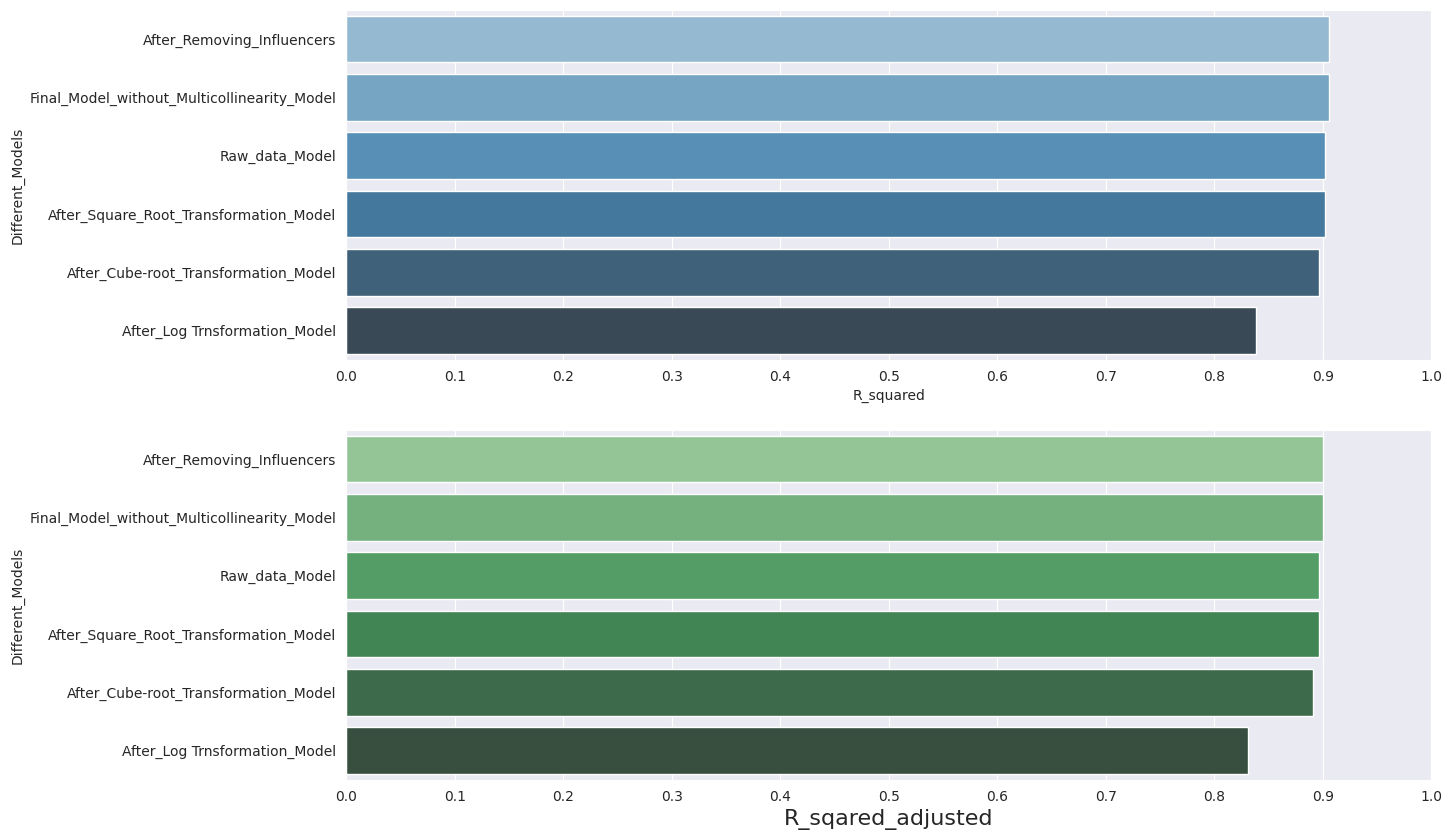

In [192]:
f, axes = plt.subplots(2,1, figsize=(14,10))

model_table.sort_values(by=['R_squared'], ascending = False, inplace=True)

sns.barplot(x = 'R_squared', y='Different_Models', data = model_table, palette = 'Blues_d', ax=axes[0])
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0,1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data= model_table, palette='Greens_d', ax=axes[1])
axes[1].set_xlabel('R_sqared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

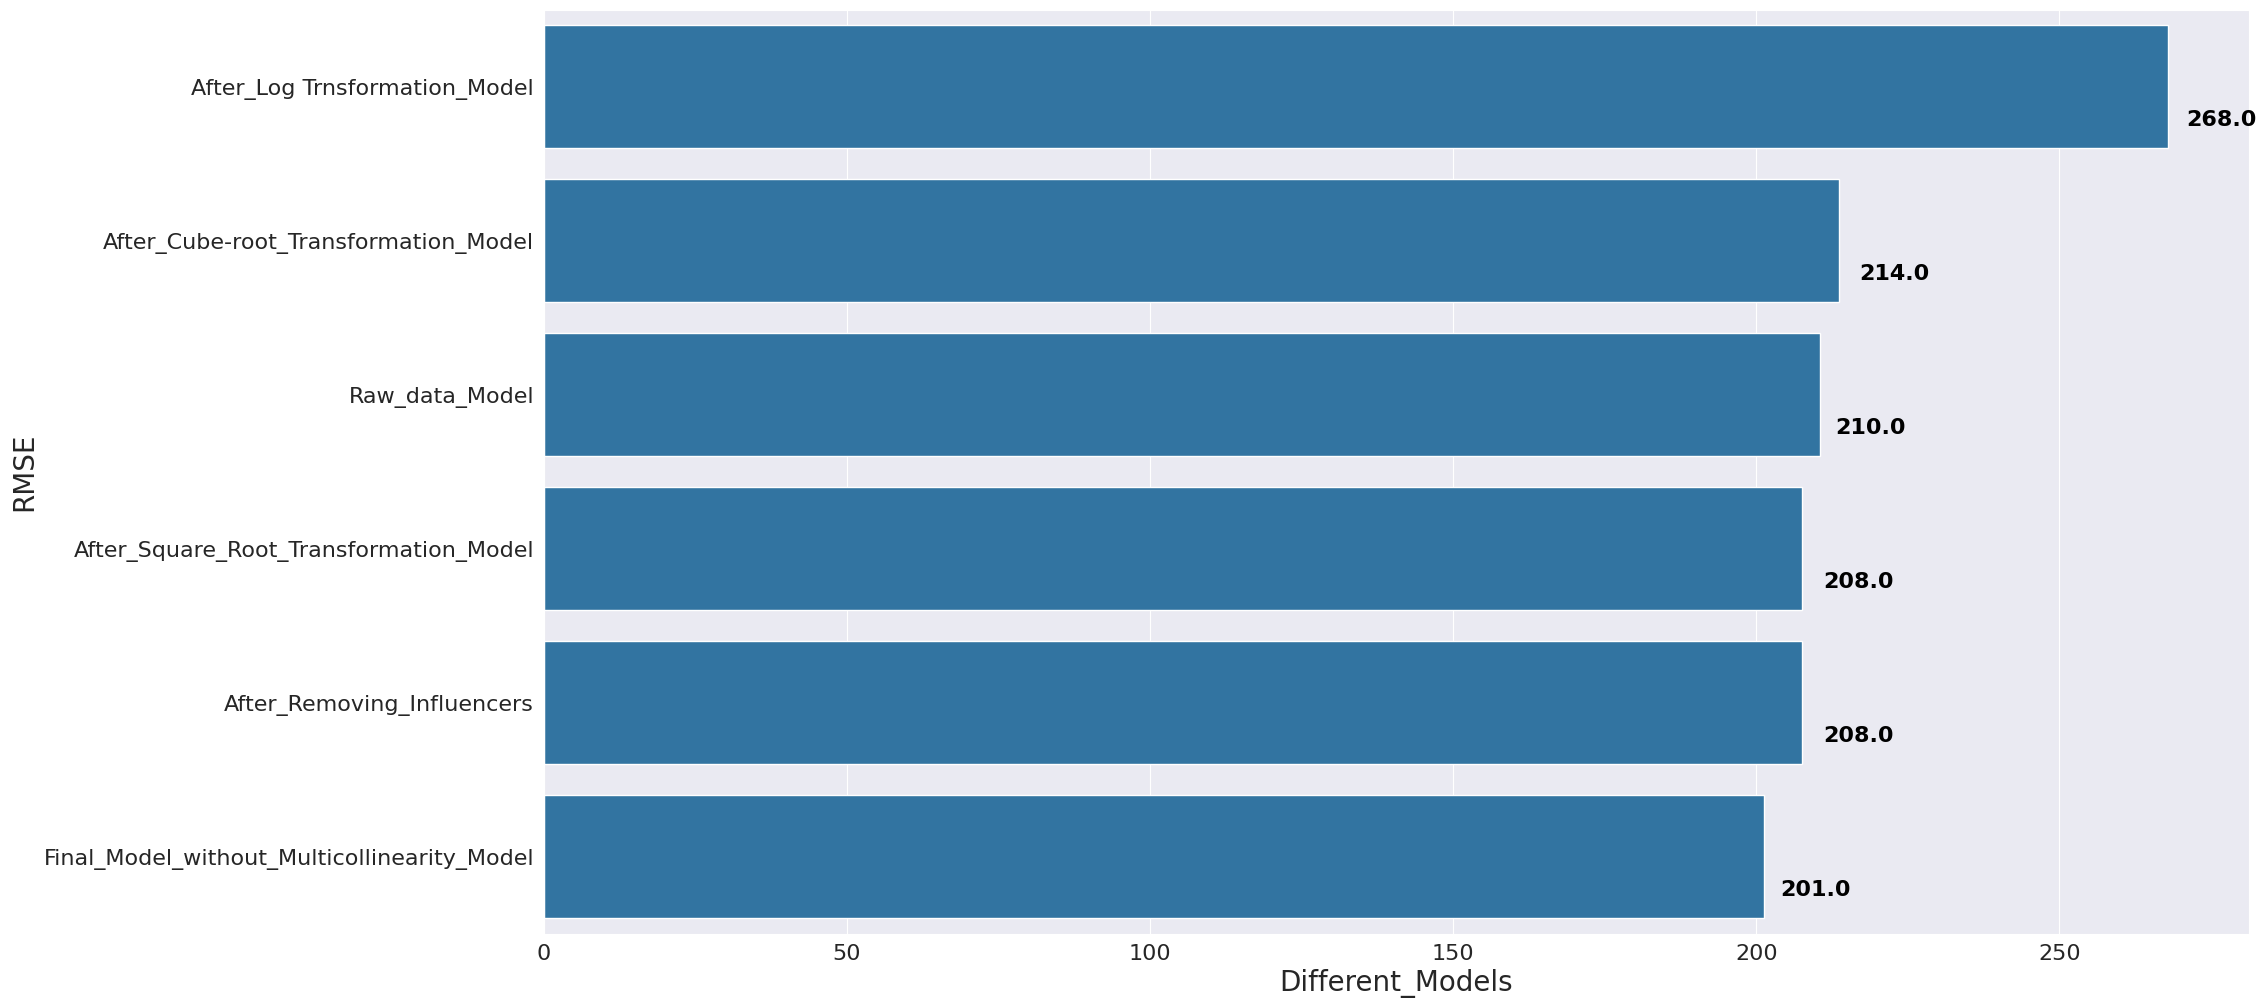

In [195]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(22,12))
sns.barplot(x = 'RMSE', y='Different_Models', data=model_table, ax=axe)
axe.set_xlabel("Different_Models", size=20)
axe.set_ylabel("RMSE", size=20)
plt.xticks(fontsize =16)
plt.yticks(fontsize = 16)

for i, v in enumerate(np.round(model_table.RMSE.values,0)):
    axe.text(v + 3, i + .25, str(v),
             color = 'black', fontweight = 'bold', fontsize = 16)
plt.show()

In [196]:
x_train.shape

(95, 8)

In [197]:
# Linear Regression
reg_model = LinearRegression().fit(x_train, y_train)
print(reg_model.score(x_train, y_train), reg_model.score(x_test, y_test))

0.9174021481939101 0.8613894814915112


In [203]:
from sklearn.ensemble import GradientBoostingRegressor
gd_model = GradientBoostingRegressor(random_state=1).fit(x_train, y_train)
print(gd_model.score(x_train, y_train), gd_model.score(x_test, y_test))

0.9827226817961613 0.7720972176112413


In [200]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(random_state=1).fit(x_train, y_train)
print(rfr_model.score(x_train, y_train), rfr_model.score(x_test, y_test))

0.9592199401691552 0.7468149949425016


In [204]:
print('Linear Regression Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, reg_model.predict(x_test))))
print('Gradient Booster Regressor Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, gd_model.predict(x_test))))
print('Random Forest Regressor Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, rfr_model.predict(x_test))))

Linear Regression Root Mean Squared Error: 223.49220618982966
Gradient Booster Regressor Root Mean Squared Error: 286.5755286771663
Random Forest Regressor Root Mean Squared Error: 286.5755286771663
